In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# 1. Using primary fuel as the target column

# Importing Dataset

In [31]:
df=pd.read_csv("database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [ ]:
df.shape

(907, 27)

- The dataset has 907 rows and 27 columns.

In [ ]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [ ]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Checking Null Values 

In [ ]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

- We can observe that there are features with more than 30% missing data.
- Before dropping those columns we check if any of these features are highly correlated with the target column.

In [ ]:
d=df.copy()

- Make copy of main dataframe df

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
list3=["name","gppd_idnr","primary_fuel","source","url","geolocation_source","other_fuel1","other_fuel2","owner"]
for i in list3:
  d[i]=enc.fit_transform(d[i].values.reshape(-1,1))

val={"country":{"IND":1},"country_long":{"India":1},"generation_data_source":{"Central Electricity Authority":1}}
d=d.replace(val)

d.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,1,1,0,657,2.5,28.1839,73.2407,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,519,98.0,24.7663,74.6090,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2,853,39.2,21.9038,69.3732,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,1.0,NaN
4,1,1,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,1.0,NaN


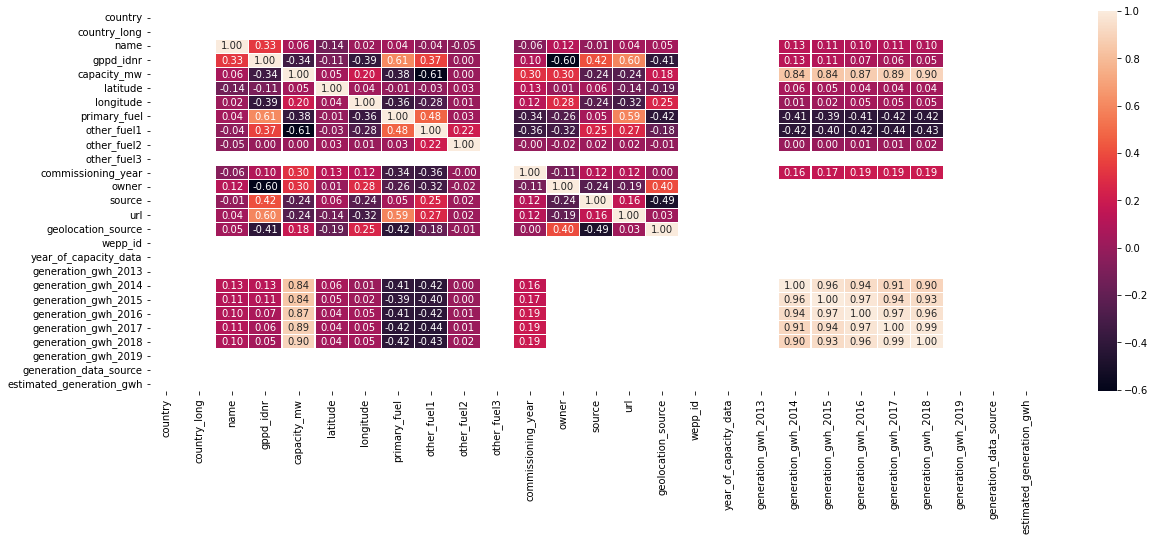

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(d.corr(),annot=True,linewidths=0.1,linecolor="White",fmt='.2f')

The following are highly correlated to target column and also have missing data more than 30% data
- year_of_capacity_data
- other_fuel1
- generation_data_source

Hence we decide to keep these columns while dropping rest of the columns that have missing data more than 30%.

In [ ]:
size=df.shape[1]
a=[]
z=["year_of_capacity_data","other_fuel1","generation_data_source"]
for i in range(size):
  col=df.iloc[:,i]
  x=col.isnull().sum()
  if x>0 or x!=df.shape[0]:
    if df.columns[i] not in z:
      loss=df.shape[0]*0.3
      if x>loss:
        a.append(df.columns[i])

for i in a:
  df=df.drop([i],axis=1)

- If data loss is more than 30% in a column, then we drop it from original dataframe df except those mentioned in above list.

In [ ]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_data_source    458
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
list1=["latitude","longitude"]
for i in list1:
  df[i]=df[i].fillna(df[i].mean())

list2=["geolocation_source"]+z
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
for i in list2:
  df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

Replacing null values.

In [ ]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_data_source    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             907 non-null    object 
 9   source                  907 non-null    object 
 10  url                     907 non-null    object 
 11  geolocation_source      907 non-null    object 
 12  year_of_capacity_data   907 non-null    float64
 13  generation_data_source  907 non-null    object 
dtypes: float64(4), object(10)
memory usage: 99

# Visualization

IND    907
Name: country, dtype: int64


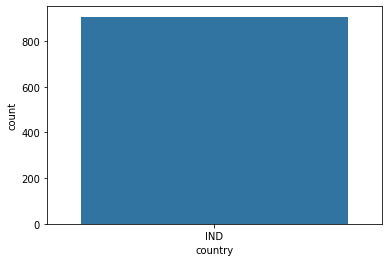

In [ ]:
sns.countplot(df["country"])
print(df["country"].value_counts())

- Only one country is mentioned in entire dataset i.e. IND

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


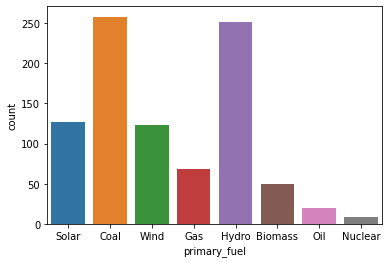

In [ ]:
sns.countplot(df['primary_fuel'])
print(df['primary_fuel'].value_counts())

Number of power plants that use following primary fuel
- Coal       - 258
- Hydro      - 251
- Solar      - 127
- Wind       - 123
- Gas         - 69
- Biomass     - 50
- Oil         - 20
- Nuclear      - 9

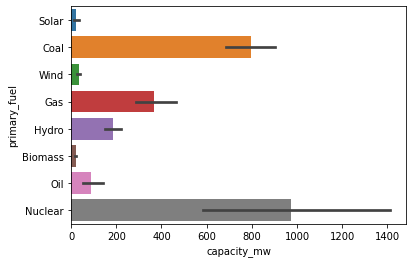

In [ ]:
import matplotlib.pyplot as plt

sns.barplot(x='capacity_mw',y='primary_fuel',data=df)


- Nuclear energy has highest electricity generating capacity in megawatts
- Solar and biomass has lowest electricity generating capacity in megawatts


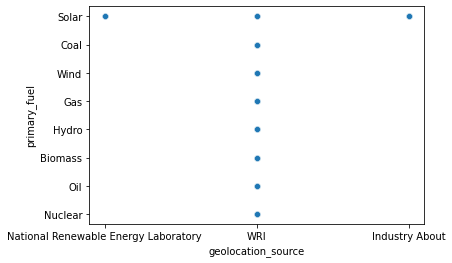

In [ ]:
sns.scatterplot(x='geolocation_source', y='primary_fuel',data=df)

- Only primary fuel Solar has geolocation source in Industry About, WRI and National Renewable Engery Laboratory 
- Rest all primary fuel have geolocation only in WRI


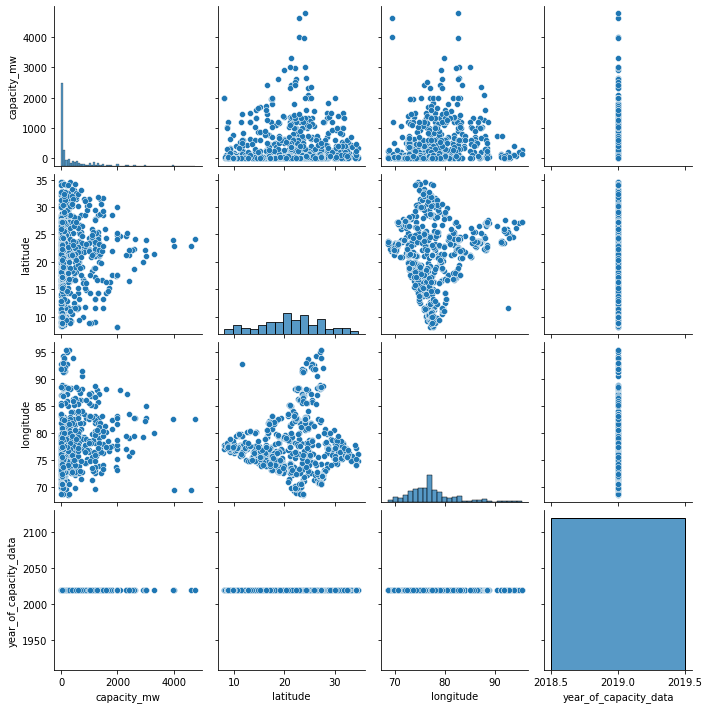

In [ ]:
sns.pairplot(df)

#Encoding Categorical Features

In [ ]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_data_source     object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
list3=["name","gppd_idnr","primary_fuel","source","url","geolocation_source","other_fuel1"]
for i in list3:
  df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

val={"country":{"IND":1},"country_long":{"India":1},"generation_data_source":{"Central Electricity Authority":1}}
df=df.replace(val)

df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,url,geolocation_source,year_of_capacity_data,generation_data_source
0,1,1,0,657,2.5,28.1839,73.2407,6,2,109,128,1,2019.0,1
1,1,1,1,519,98.0,24.7663,74.6090,1,2,174,173,2,2019.0,1
2,1,1,2,853,39.2,21.9038,69.3732,7,2,21,205,2,2019.0,1
3,1,1,3,0,135.0,23.8712,91.3602,2,2,22,58,2,2019.0,1
4,1,1,4,1,1800.0,21.9603,82.4091,1,2,22,58,2,2019.0,1


# Detecting Correlation

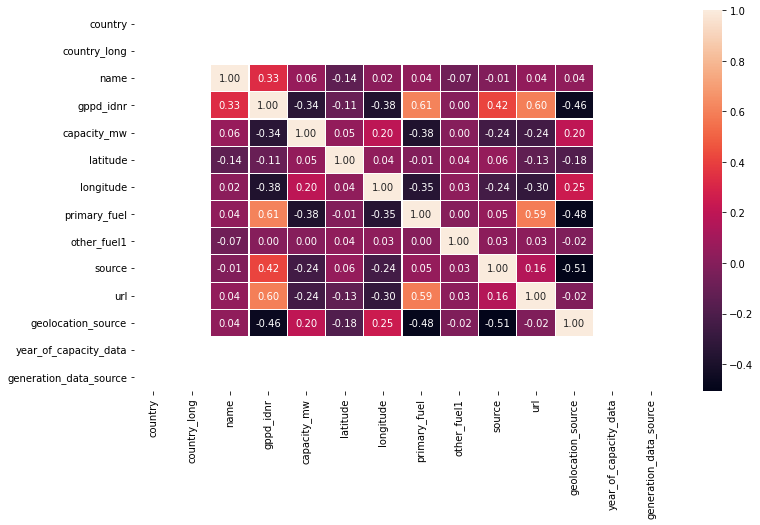

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="White",fmt='.2f')

- Name has 4 percent correlation with target column (primary fuel) which is considered as a very weak +ve bond.
- gpd_idnr has 61 percent correlation with target column (primary fuel) which is considered as a strong +ve bond.
- capacity_mw has -38 percent correlation with target column (primary fuel) which is considered as a strong -ve bond.
- latitude has -1 percent correlation with target column (primary fuel) which is considered as a weak -ve bond.
- longitude has -35 percent correlation with target column (primary fuel) which is considered as a strong -ve bond.
- source has 5 percent correlation with target column (primary fuel) which is considered as a very weak +ve bond.
- url has 59 percent correlation with target column (primary fuel) which is considered as a strong +ve bond.
- geolocation_source -48 percent correlation with target column (primary fuel) which is considered as a very strong -ve bond.

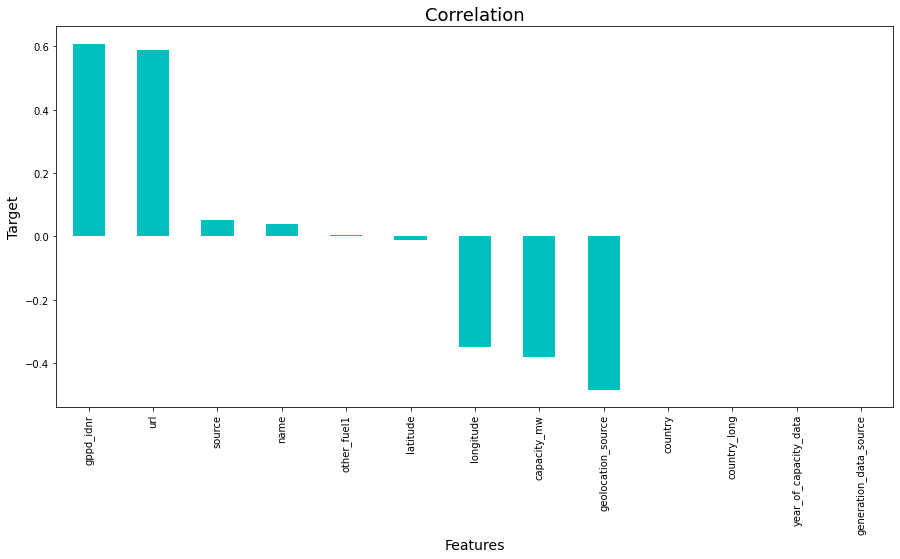

In [ ]:
plt.figure(figsize=(15,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Max -ve Correlation : geolocation_source

- Min -ve Correlation : latitude

- Max +ve Correlation : gppd_idnr

- Min +ve Correlation : name

# Describing data

In [ ]:
df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
count,907.0,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,1.0,1.0,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,43.847850,94.469680,1.733186
std,0.0,0.0,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,44.642818,70.381222,0.677151
min,1.0,1.0,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,22.000000,58.000000,2.000000
50%,1.0,1.0,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,22.000000,58.000000,2.000000
75%,1.0,1.0,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,29.500000,115.500000,2.000000
max,1.0,1.0,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,190.000000,303.000000,2.000000


- There is huge gap between 75% and Max value which indicates presence of outlier in some of the features.

- Data is widely spread in most of the features.

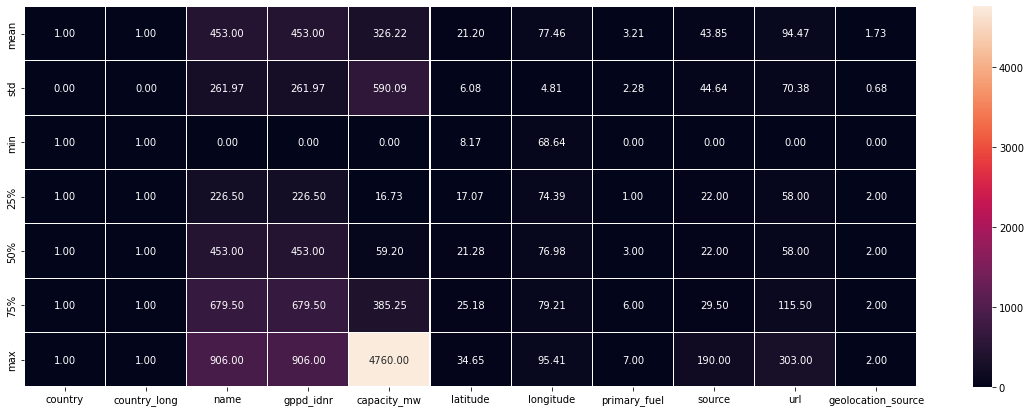

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.describe()[1:],annot=True,linewidths=0.1,linecolor="white",fmt="0.2f")

country	
- mean -	1.0	
- std	- 0.0	
- min -	1.0	
- max	- 1.0	

country_long	
- mean -	1.0	
- std	- 0.0	
- min -	1.0	
- max	- 1.0	

name	
- mean -	453.000000
- std	- 261.972645
- min -	0.000000
- max	- 906.000000

gppd_idnr	
- mean -	453.000000
- std	- 261.972645
- min -	0.000000	
- max	-	906.000000	

capacity_mw	
- mean -	326.223755
- std - 590.085456
- min -		0.000000	
- max	- 	4760.000000	

latitude	
- mean -	21.197918	
- std	- 6.079148	
- min -	8.168900	
- max	- 34.649000

longitude	
- mean	- 77.464907	
- std	- 4.812291	
- min	- 68.644700	
- max	- 95.408000	

primary_fuel	
- mean	- 3.206174	
- std	- 2.280652
- min	- 0.000000
- max	- 7.000000

source	
- mean	- 43.847850	
- std	- 44.642818
- min	- 0.000000
- max	- 190.000000	

url	
- mean	- 94.469680	
- std	- 70.381222	
- min	- 0.000000	
- max	- 303.000000

geolocation_source
- mean	-	1.733186
- std	- 0.677151
- min	- 0.000000
- max	- 2.000000



# Detecting Outliers

In [ ]:
df.shape

(907, 14)

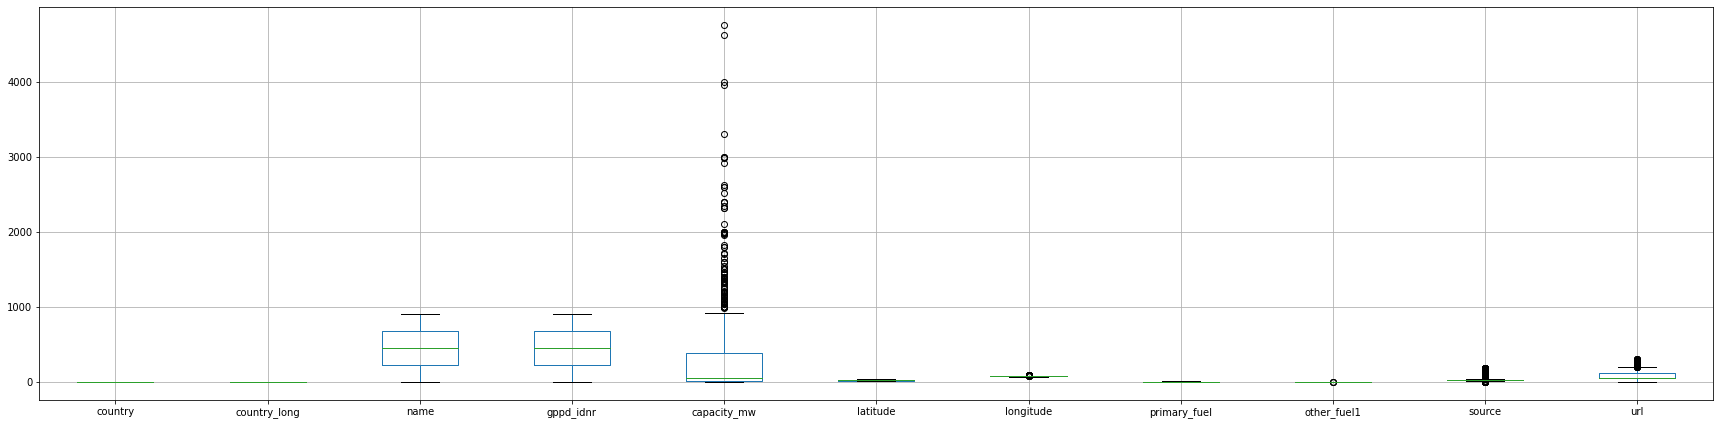

In [ ]:
df.iloc[:,:11].boxplot(figsize=(30,7))
plt.subplots_adjust(bottom=0.1)
plt.show()

The following features contain outliers
- Capacity_mw
- longitude
- source
- url
- geolocation_source

From the above mentioned features we can only remove outliers from capacity_mw and longitude as they are non categorical in nature.

In [ ]:
new_df_cap=df.copy()

In [ ]:
def remove_outliers(n):
  Q1=np.percentile(df[n],25,interpolation='midpoint')
  Q3=np.percentile(df[n],75,interpolation='midpoint')
  iqr=Q3-Q1
  percentile25=df[n].quantile(0.25)
  percentile75=df[n].quantile(0.75)
  upper_limit=percentile75+1.5*iqr
  lower_limit=percentile25-1.5*iqr
  df[df[n]>upper_limit]
  df[df[n]<lower_limit]

  new_df=df[df[n]<upper_limit]
  
  new_df_cap[n]=np.where(
      new_df_cap[n] > upper_limit,
      upper_limit,
      np.where(
          new_df_cap[n] < lower_limit,
          lower_limit,
          new_df_cap[n] ) 
      )
  sns.boxplot(new_df_cap[n])

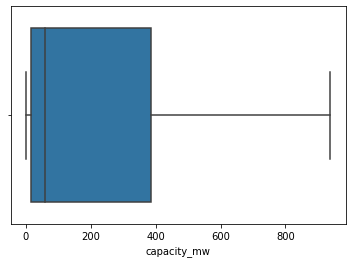

In [ ]:
remove_outliers("capacity_mw")

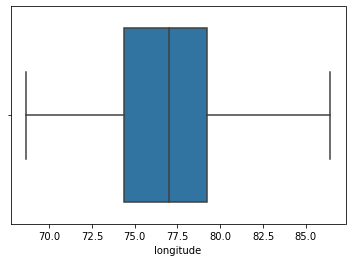

In [ ]:
remove_outliers("longitude")

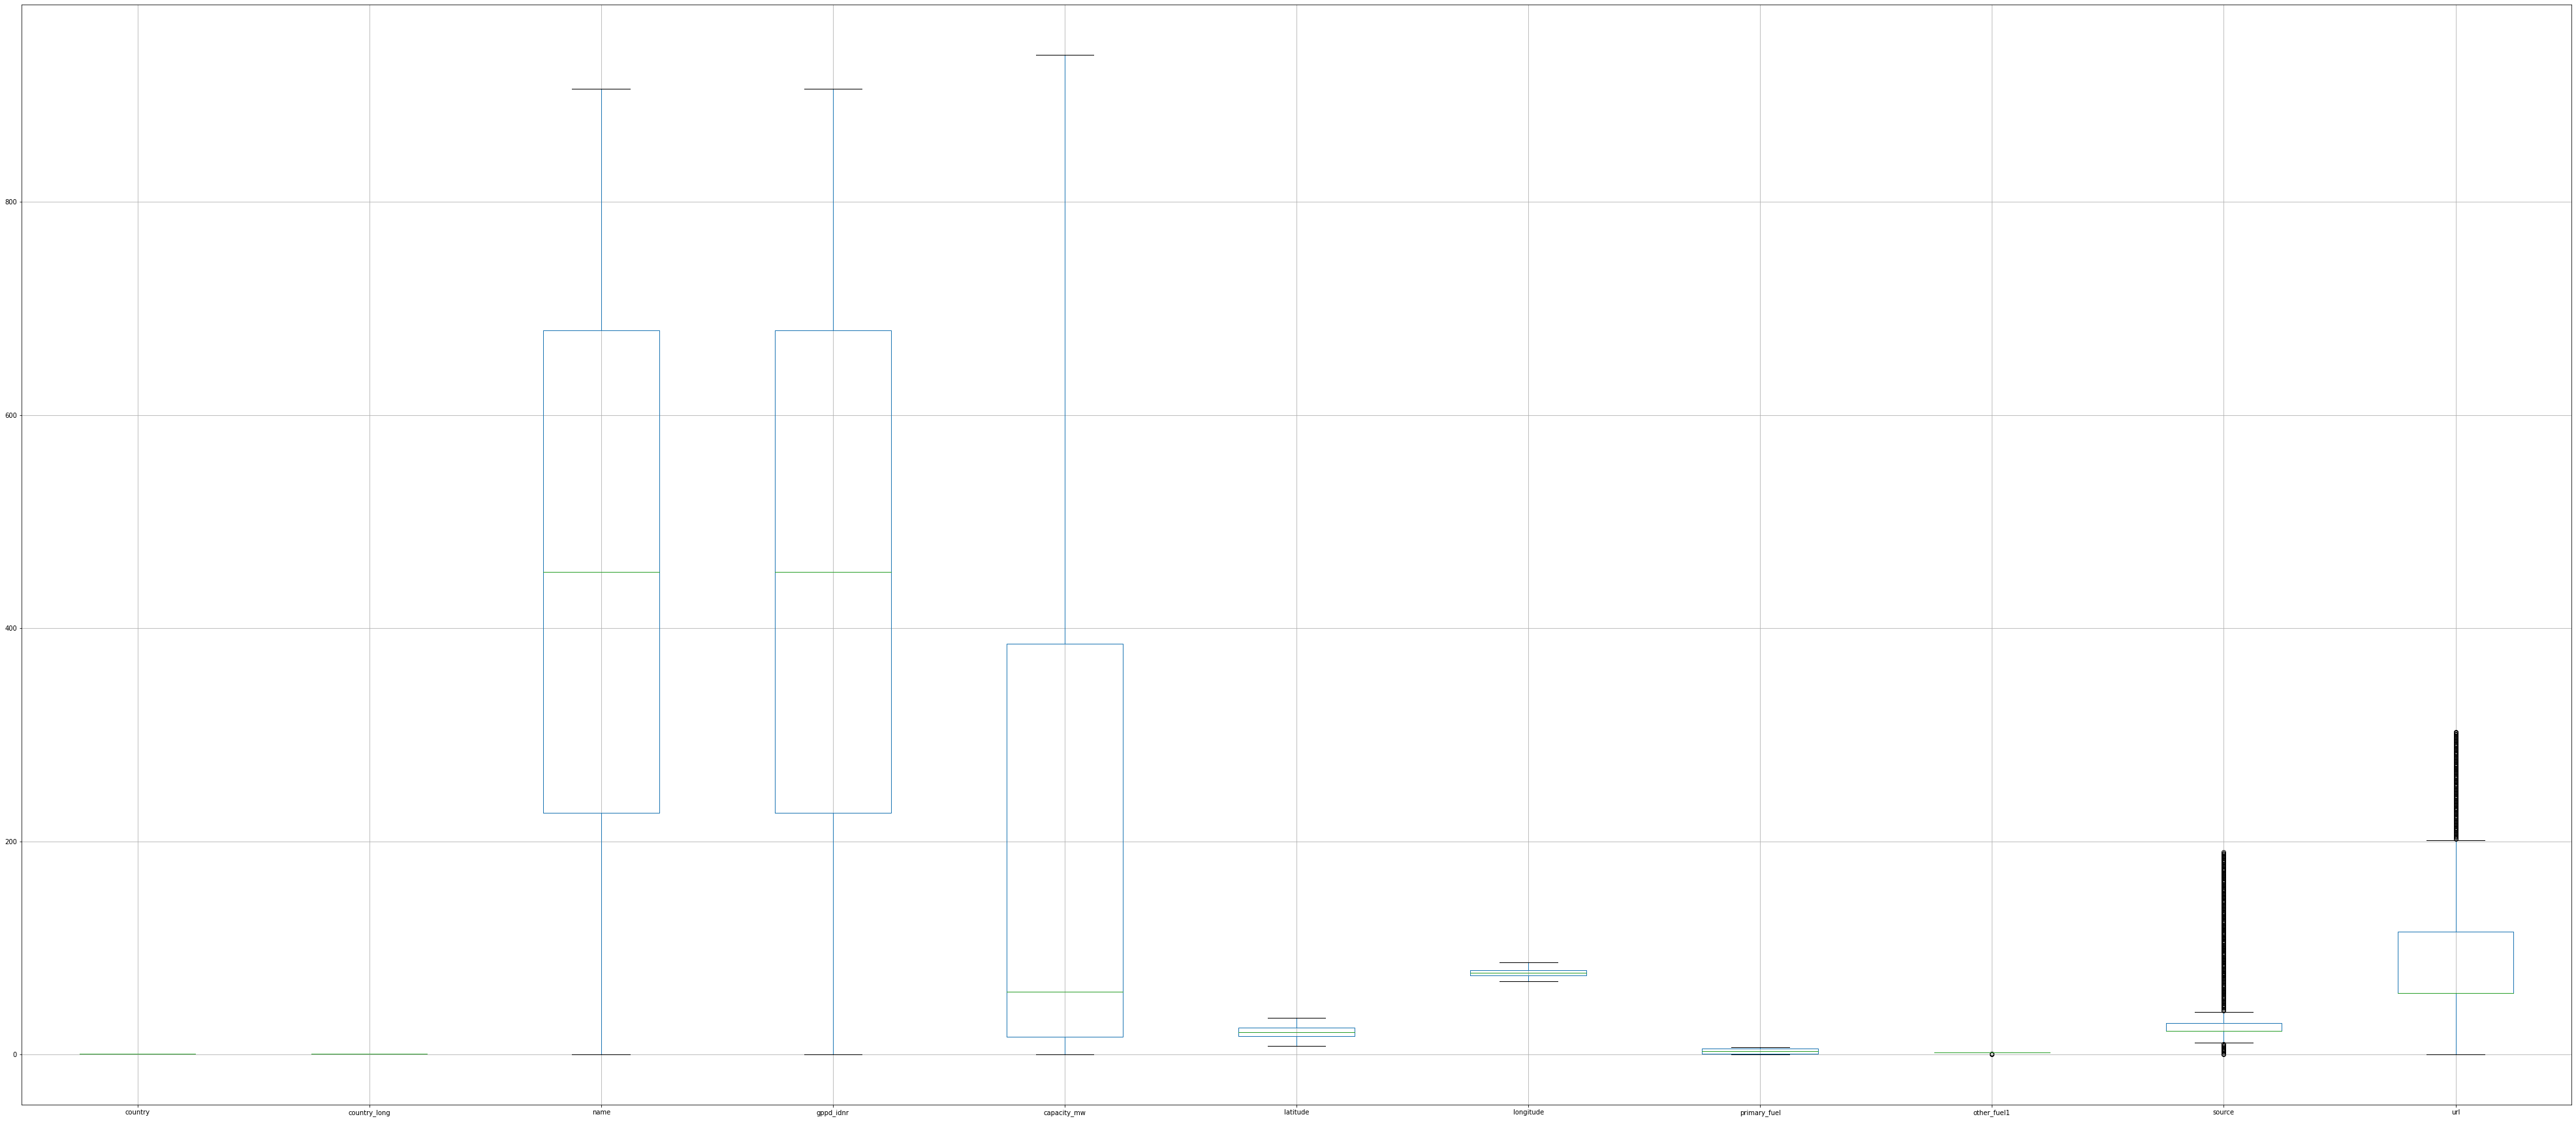

In [ ]:
new_df_cap.iloc[:,:11].boxplot(figsize=(70,30))
plt.subplots_adjust(bottom=0.1)
plt.show()

# Separating input feature and target

In [ ]:
x=new_df_cap.drop(["primary_fuel"],axis=1)
x.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,source,url,geolocation_source,year_of_capacity_data,generation_data_source
0,1,1,0,657,2.5000,28.1839,73.2407,2,109,128,1,2019.0,1
1,1,1,1,519,98.0000,24.7663,74.6090,2,174,173,2,2019.0,1
2,1,1,2,853,39.2000,21.9038,69.3732,2,21,205,2,2019.0,1
3,1,1,3,0,135.0000,23.8712,86.4319,2,22,58,2,2019.0,1
4,1,1,4,1,938.0375,21.9603,82.4091,2,22,58,2,2019.0,1


In [ ]:
y=new_df_cap["primary_fuel"]
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int64

# Detecting Skewness

In [ ]:
x.skew().sort_values()

other_fuel1              -20.453120
geolocation_source        -2.159841
latitude                  -0.149698
country                    0.000000
country_long               0.000000
name                       0.000000
gppd_idnr                  0.000000
year_of_capacity_data      0.000000
generation_data_source     0.000000
longitude                  0.561989
capacity_mw                1.288530
url                        1.510537
source                     1.827373
dtype: float64

Keeping +/- 0.5 as the range of the skewness, the following features are skewed
- geolocation_source  
- longitude            
- capacity_mw           
- url                   
- source                      

From above list only longitude and capacity_mw are numeric, hence we can remove skewness.

Text(0, 0.5, '')

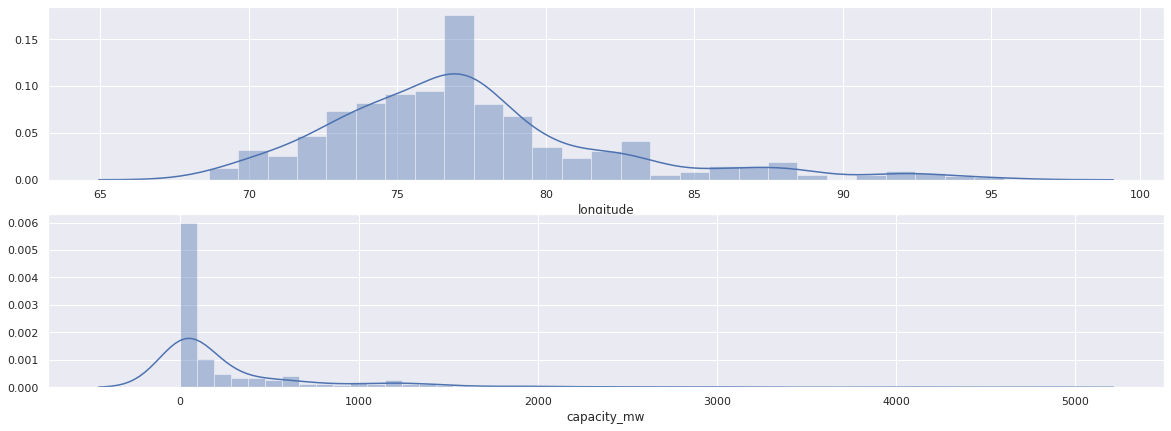

In [ ]:
sns.set()
fig,axes= plt.subplots(2,figsize=(20,7))
sns.distplot(df["longitude"],ax=axes[0])
axes[0].set_ylabel("")
sns.distplot(df["capacity_mw"],ax=axes[1])
axes[1].set_ylabel("")

In [ ]:
from sklearn.preprocessing import power_transform
list4=["longitude","capacity_mw"]
for i in list4:
  x[i]=power_transform(x[i].values.reshape(-1,1))

Text(0, 0.5, '')

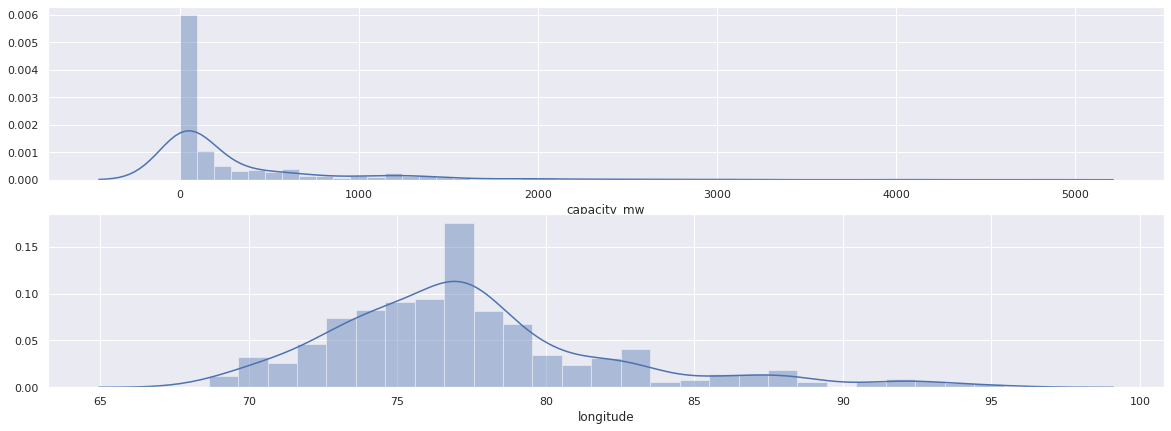

In [ ]:
sns.set()
fig,axes= plt.subplots(2,figsize=(20,7))
sns.distplot(df.iloc[:,4],ax=axes[0])
axes[0].set_ylabel("")
sns.distplot(df.iloc[:,6],ax=axes[1])
axes[1].set_ylabel("")

In [ ]:
x.skew().sort_values()

other_fuel1              -20.453120
geolocation_source        -2.159841
latitude                  -0.149698
capacity_mw               -0.003609
country                    0.000000
country_long               0.000000
name                       0.000000
gppd_idnr                  0.000000
year_of_capacity_data      0.000000
generation_data_source     0.000000
longitude                  0.017042
url                        1.510537
source                     1.827373
dtype: float64

# Detecting Collinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(x)

,variables,VIF
0,country,0.000000
1,country_long,0.000000
2,name,1.397720
3,gppd_idnr,3.567628
4,capacity_mw,1.735956
5,latitude,1.105511
6,longitude,1.293221
7,other_fuel1,1.012348
8,source,1.455355
9,url,2.038178


- VIF<5, hence there is no collinearity

# Oversampling

In [ ]:
y.value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_new,y_new=smt.fit_resample(x,y)
y=y_new
y.value_counts()

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: primary_fuel, dtype: int64

# Traning and Testing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
mns=MinMaxScaler()
s=mns.fit_transform(x_new)
x=pd.DataFrame(data=s)
print(x)

       0    1         2         3         4         5         6    7   \
0     0.0  0.0  0.000000  0.725166  0.180169  0.755851  0.355326  1.0   
1     0.0  0.0  0.001104  0.572848  0.667088  0.626788  0.444575  1.0   
2     0.0  0.0  0.002208  0.941501  0.534894  0.518688  0.062768  1.0   
3     0.0  0.0  0.003311  0.000000  0.713822  0.592985  1.000000  1.0   
4     0.0  0.0  0.004415  0.001104  1.000000  0.520821  0.846547  1.0   
...   ...  ...       ...       ...       ...       ...       ...  ...   
2059  0.0  0.0  0.939294  0.758278  0.561402  0.445272  0.518056  1.0   
2060  0.0  0.0  0.619205  0.758278  0.617389  0.628009  0.091281  1.0   
2061  0.0  0.0  0.281457  0.747241  0.404852  0.410297  0.259714  1.0   
2062  0.0  0.0  0.558499  0.763797  0.572722  0.717235  0.169264  1.0   
2063  0.0  0.0  0.988962  0.966887  0.246324  0.086268  0.587886  1.0   

            8         9    10   11   12  
0     0.573684  0.422442  0.5  0.0  0.0  
1     0.915789  0.570957  1.0  0.0  0.0

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [ ]:
for i in range(0,100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
  lg.fit(x_train,y_train)
  pred_train=lg.predict(x_train)
  pred_test=lg.predict(x_test)
  if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
    print("At random state",i)
    print("Train Accuracy: ",round(accuracy_score(y_train,pred_train)))
    print("Test Accuracy: ",round(accuracy_score(y_test,pred_test)))
    print("\n")

At random state 2
Train Accuracy:  1
Test Accuracy:  1


At random state 49
Train Accuracy:  1
Test Accuracy:  1


At random state 91
Train Accuracy:  1
Test Accuracy:  1




In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)
lg.fit(x_train,y_train)
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)
print("Train Accuracy: ",round(accuracy_score(y_train,pred_train)))
print("Test Accuracy: ",round(accuracy_score(y_test,pred_test)))

Train Accuracy:  1
Test Accuracy:  1


# Cross Validation

In [ ]:
ls=accuracy_score(y_test,pred_test)
for j in range(2,20):
  cv_score=cross_val_score(lg,x,y,cv=j)
  print(cv_score)
  cv_mean=cv_score.mean()
  print("At cv:",j)
  print("cv score:",cv_mean*100)
  print("accuracy:",ls*100)
  print("\n")

[0.56782946 0.57655039]
At cv: 2
cv score: 57.218992248062015
accuracy: 66.10169491525424


[0.56540698 0.65552326 0.60319767]
At cv: 3
cv score: 60.80426356589147
accuracy: 66.10169491525424


[0.61821705 0.65116279 0.64922481 0.63565891]
At cv: 4
cv score: 63.856589147286826
accuracy: 66.10169491525424


[0.61743341 0.63196126 0.67312349 0.66828087 0.62621359]
At cv: 5
cv score: 64.34025247420014
accuracy: 66.10169491525424


[0.62790698 0.61627907 0.67732558 0.63953488 0.68604651 0.63081395]
At cv: 6
cv score: 64.63178294573643
accuracy: 66.10169491525424


[0.60338983 0.62033898 0.65423729 0.67457627 0.6440678  0.68474576
 0.63945578]
At cv: 7
cv score: 64.5830244930902
accuracy: 66.10169491525424


[0.60465116 0.64728682 0.60852713 0.68992248 0.63953488 0.65891473
 0.68604651 0.63953488]
At cv: 8
cv score: 64.68023255813954
accuracy: 66.10169491525424


[0.6        0.66086957 0.62608696 0.6768559  0.65065502 0.65938865
 0.69868996 0.6768559  0.63755459]
At cv: 9
cv score: 65.41062

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.71      0.91      0.79        53
           1       0.46      0.55      0.50        47
           2       0.35      0.12      0.18        48
           3       0.61      0.50      0.55        56
           4       0.51      0.78      0.62        50
           5       0.62      0.46      0.53        57
           6       1.00      0.96      0.98        51
           7       0.86      1.00      0.93        51

    accuracy                           0.66       413
   macro avg       0.64      0.66      0.64       413
weighted avg       0.64      0.66      0.64       413



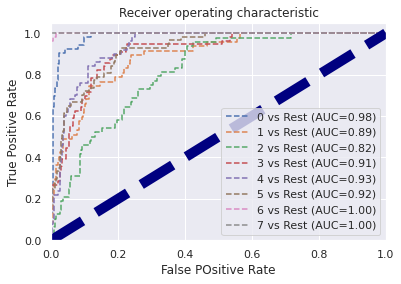

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict_proba(x_test)
classes=np.unique(y_test)

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
fpr={}
tpr={}
thresh={}
roc_auc=dict()

n_class=classes.shape[0]

for i in range(n_class):
  fpr[i],tpr[i],thresh[i]=roc_curve(y_test_binarized[:,i],pred[:,i])
  roc_auc[i]=auc(fpr[i],tpr[i])

  plt.plot(fpr[i],tpr[i],linestyle='--',label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
  
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False POsitive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.show()


# Model Selection

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",round(accuracy_score(y_train,model_pred_train)*100,2))
    print("Accuracy of test data :",round(accuracy_score(y_test,model_pred_test)*100,2))
    rfscore=cross_val_score(algorithm_instance,x,y,cv=15)
    rfc=rfscore.mean()
    print('Cross Val Score:',round(rfc*100,2))
    print("\nClassification report for test data\n",classification_report(y_test,model_pred_test))
    print("Classification report for training data\n",classification_report(y_train,model_pred_train))
    print("Confusion Matrix\n",confusion_matrix(y_test,model_pred_test))
    print("\n")
   

    pred=algorithm_instance.predict_proba(x_test)
    classes=np.unique(y_test)

    y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
    fpr={}
    tpr={}
    thresh={}
    roc_auc=dict()

    n_class=classes.shape[0]
    a=[]
    def Average(a):
      return mean(a)

    for i in range(n_class):
      fpr[i],tpr[i],thresh[i]=roc_curve(y_test_binarized[:,i],pred[:,i])
      roc_auc[i]=auc(fpr[i],tpr[i])
      a.append(roc_auc[i])
      plt.plot(fpr[i],tpr[i],linestyle='--',label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

      if i==n_class-1:
        avg=Average(a)
        print("Model AUC : ",round(avg*100,2))
  
  
    plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False POsitive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc='lower right')
    plt.show()


#KNeighborsClassifier

Accuracy of training model : 88.55
Accuracy of test data : 83.54
Cross Val Score: 83.58

Classification report for test data
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        53
           1       0.65      0.55      0.60        47
           2       0.62      0.71      0.66        48
           3       0.94      0.52      0.67        56
           4       0.85      1.00      0.92        50
           5       0.81      0.96      0.88        57
           6       1.00      0.96      0.98        51
           7       0.98      1.00      0.99        51

    accuracy                           0.84       413
   macro avg       0.84      0.83      0.83       413
weighted avg       0.84      0.84      0.83       413

Classification report for training data
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       205
           1       0.82      0.62      0.71       211
           2       

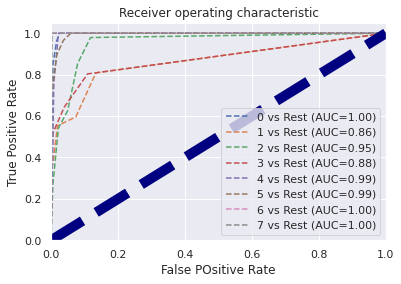

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k=KNeighborsClassifier()
model_selection(k,x_train,y_train,x_test,y_test)

# SVC

Accuracy of training model : 73.77
Accuracy of test data : 74.82
Cross Val Score: 72.72

Classification report for test data
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        53
           1       0.62      0.53      0.57        47
           2       0.49      0.38      0.42        48
           3       0.62      0.62      0.62        56
           4       0.60      0.92      0.72        50
           5       0.83      0.60      0.69        57
           6       1.00      0.96      0.98        51
           7       0.96      1.00      0.98        51

    accuracy                           0.75       413
   macro avg       0.75      0.75      0.74       413
weighted avg       0.75      0.75      0.74       413

Classification report for training data
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       205
           1       0.67      0.48      0.56       211
           2       

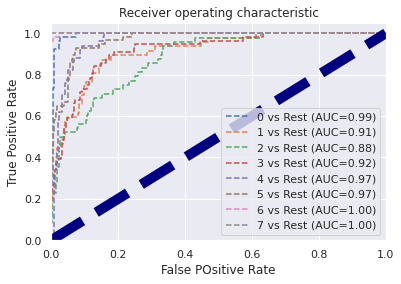

In [ ]:
from sklearn import svm
s=svm.SVC(probability=True)
model_selection(s,x_train,y_train,x_test,y_test)

# DecisionTressClassifier Model

Accuracy of training model : 100.0
Accuracy of test data : 86.92
Cross Val Score: 84.21

Classification report for test data
               precision    recall  f1-score   support

           0       0.91      0.94      0.93        53
           1       0.73      0.70      0.72        47
           2       0.74      0.83      0.78        48
           3       0.85      0.59      0.69        56
           4       0.84      0.94      0.89        50
           5       0.87      0.95      0.91        57
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        51

    accuracy                           0.87       413
   macro avg       0.87      0.87      0.86       413
weighted avg       0.87      0.87      0.87       413

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       211
           2       

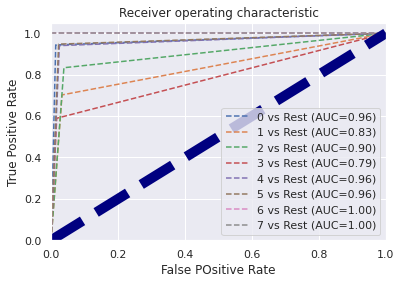

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

Ensemble Methods

# RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameter={'criterion':['gini', 'entropy', 'log_loss'],
          'max_features' : [None,"sqrt","log2"],
           'class_weight':['balanced',' balanced_subsample'],
           'oob_score':['True','False'],
           'n_estimators':range(0,200,10)}

rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 170, 'oob_score': 'False'}


Accuracy of training model : 100.0
Accuracy of test data : 90.31
Cross Val Score: 88.76

Classification report for test data
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        53
           1       0.85      0.72      0.78        47
           2       0.80      0.83      0.82        48
           3       0.86      0.66      0.75        56
           4       0.85      1.00      0.92        50
           5       0.92      1.00      0.96        57
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        51

    accuracy                           0.90       413
   macro avg       0.90      0.90      0.90       413
weighted avg       0.90      0.90      0.90       413

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       211
           2       

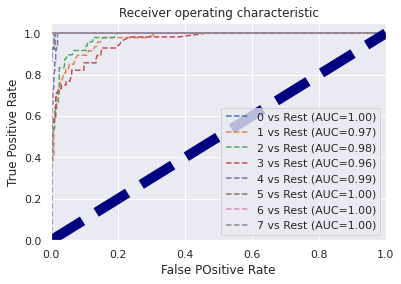

In [ ]:
rf=RandomForestClassifier(n_estimators=170, class_weight= 'balanced',criterion='entropy', max_features='log2', oob_score= 'False')
model_selection(rf,x_train,y_train,x_test,y_test)

#AdaBoostClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameter={'algorithm':['SAMME', 'SAMME.R'],
          'learning_rate' : [0.0,1.0,2.0],
           'random_state':range(0,100,10),
           'n_estimators':range(0,100,10)}

rf2=AdaBoostClassifier()
clf=GridSearchCV(rf2,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 60, 'random_state': 0}


Accuracy of training model : 65.96
Accuracy of test data : 66.83
Cross Val Score: 55.96

Classification report for test data
               precision    recall  f1-score   support

           0       0.75      0.96      0.84        53
           1       0.65      0.28      0.39        47
           2       0.42      0.50      0.46        48
           3       0.59      0.36      0.44        56
           4       0.52      0.82      0.64        50
           5       0.49      0.47      0.48        57
           6       1.00      0.96      0.98        51
           7       1.00      1.00      1.00        51

    accuracy                           0.67       413
   macro avg       0.68      0.67      0.65       413
weighted avg       0.68      0.67      0.65       413

Classification report for training data
               precision    recall  f1-score   support

           0       0.79      0.93      0.86       205
           1       0.64      0.30      0.41       211
           2       

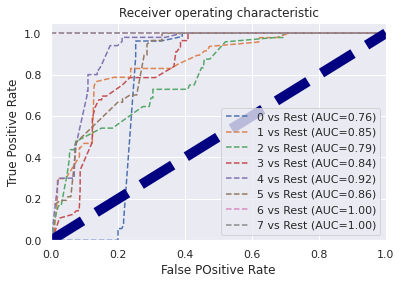

In [ ]:
rf2=AdaBoostClassifier(algorithm='SAMME', learning_rate= 1.0, n_estimators= 60,random_state= 0)
model_selection(rf2,x_train,y_train,x_test,y_test)

#GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameter={'loss':['log_loss', 'deviance', 'exponential'],
          'learning_rate' : [0.0,1.0,2.0],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2'],
           'n_estimators':range(0,100,10)}

rf3=GradientBoostingClassifier()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'deviance', 'max_features': 'sqrt', 'n_estimators': 20}


Accuracy of training model : 78.38
Accuracy of test data : 67.55
Cross Val Score: 68.12

Classification report for test data
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        53
           1       0.65      0.66      0.65        47
           2       0.68      0.75      0.71        48
           3       0.70      0.55      0.62        56
           4       0.86      0.84      0.85        50
           5       0.85      0.89      0.87        57
           6       0.39      0.80      0.53        51
           7       1.00      0.02      0.04        51

    accuracy                           0.68       413
   macro avg       0.75      0.67      0.64       413
weighted avg       0.75      0.68      0.65       413

Classification report for training data
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       205
           1       0.94      0.88      0.91       211
           2       

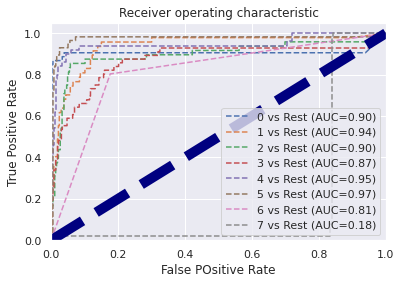

In [ ]:
rf3=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=1.0, loss='deviance', max_features= 'sqrt', n_estimators= 20)
model_selection(rf3,x_train,y_train,x_test,y_test)

#BaggingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
parameter={'oob_score':['True','False'],
          'n_jobs':range(0,10),
           'random_state':range(0,100,10),
           'n_estimators':range(10,100,10)}

rf4=BaggingClassifier()
clf=GridSearchCV(rf4,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_estimators': 50, 'n_jobs': 1, 'oob_score': 'True', 'random_state': 90}


Accuracy of training model : 100.0
Accuracy of test data : 86.92
Cross Val Score: 87.07

Classification report for test data
               precision    recall  f1-score   support

           0       0.91      0.98      0.95        53
           1       0.75      0.70      0.73        47
           2       0.67      0.79      0.72        48
           3       0.86      0.55      0.67        56
           4       0.87      0.92      0.89        50
           5       0.89      1.00      0.94        57
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        51

    accuracy                           0.87       413
   macro avg       0.87      0.87      0.86       413
weighted avg       0.87      0.87      0.86       413

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       211
           2       

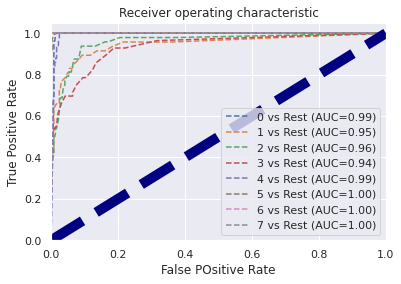

In [ ]:
rf4=BaggingClassifier(oob_score= True, n_jobs= 1, n_estimators= 50, random_state= 90)
model_selection(rf4,x_train,y_train,x_test,y_test)

#Stacking Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

estimators = [ ('knc', KNeighborsClassifier()), ('svr',SVC()) ]
parameter={
            'stack_method':['auto', 'predict_proba', 'decision_function', 'predict'],
           'n_jobs':range(0,100,10)
         }

rf5=StackingClassifier(estimators)
clf=GridSearchCV(rf5,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_jobs': 10, 'stack_method': 'auto'}


Accuracy of training model : 89.46
Accuracy of test data : 85.47
Cross Val Score: 84.5

Classification report for test data
               precision    recall  f1-score   support

           0       0.91      0.96      0.94        53
           1       0.67      0.64      0.65        47
           2       0.66      0.69      0.67        48
           3       0.87      0.61      0.72        56
           4       0.86      1.00      0.93        50
           5       0.86      0.96      0.91        57
           6       1.00      0.96      0.98        51
           7       0.98      1.00      0.99        51

    accuracy                           0.85       413
   macro avg       0.85      0.85      0.85       413
weighted avg       0.86      0.85      0.85       413

Classification report for training data
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       205
           1       0.80      0.66      0.73       211
           2       0

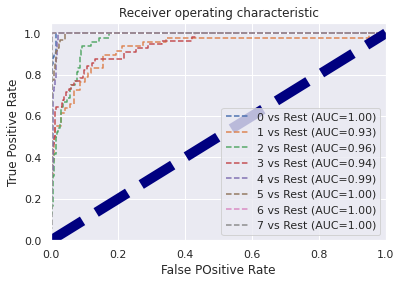

In [ ]:
rf5=StackingClassifier(estimators,n_jobs=10, stack_method= 'auto')
model_selection(rf5,x_train,y_train,x_test,y_test)

# Model Saving

In [ ]:
import pickle
filename='rfz.pk1'
pickle.dump(rf,open(filename,'wb'))

We selected RandomForest Classifier model since
- it has best cross validation score among all the model and high accuracy.
- auc score is 0.98

# Loading Model

In [ ]:
loaded_model=pickle.load(open('rfz.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

90.31476997578693


# Testing Loaded Model

In [ ]:
def test_inp():
  inp = []
  i=0
  print("Enter single input\n")
  while i<13:
    inn=float(input(f"Enter input {i+1}: "))
    inp.append(inn)
    i=i+1
  input_data_as_numpy_array = np.asarray(inp)
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
  prediction = loaded_model.predict(input_data_reshaped)
  print("\nPrimary Fuel:",prediction[0])

In [ ]:
print("Input\n",x.head(),"\n\nOutput\n",y.head())

Input
     0    1         2         3         4         5         6    7         8   \
0  0.0  0.0  0.000000  0.725166  0.180169  0.755851  0.355326  1.0  0.573684   
1  0.0  0.0  0.001104  0.572848  0.667088  0.626788  0.444575  1.0  0.915789   
2  0.0  0.0  0.002208  0.941501  0.534894  0.518688  0.062768  1.0  0.110526   
3  0.0  0.0  0.003311  0.000000  0.713822  0.592985  1.000000  1.0  0.115789   
4  0.0  0.0  0.004415  0.001104  1.000000  0.520821  0.846547  1.0  0.115789   

         9    10   11   12  
0  0.422442  0.5  0.0  0.0  
1  0.570957  1.0  0.0  0.0  
2  0.676568  1.0  0.0  0.0  
3  0.191419  1.0  0.0  0.0  
4  0.191419  1.0  0.0  0.0   

Output
 0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int64


In above table we have seen that 
- Input 0th row gives output 6 i.e Solar
- Input 1st row gives output 1 i.e Coal
- Input 2nd row gives output 7 i.e Wind
- Input 3rd row gives output 2 i.e Gas
- Input 4th row gives output 1 i.e Coal 

So we can use this input data with loaded model to test if model gives correct output

In [ ]:
test_inp()

Enter single input

Enter input 1: 0.0
Enter input 2: 0.0
Enter input 3: 0.0
Enter input 4: 0.725166  
Enter input 5: 0.180169  
Enter input 6: 0.755851  
Enter input 7: 0.355326  
Enter input 8: 1.0  
Enter input 9: 0.573684 
Enter input 10: 0.422442 
Enter input 11:  0.5
Enter input 12: 0.0
Enter input 13: 0.0

Primary Fuel: 6


In [ ]:
test_inp()

Enter single input

Enter input 1: 0.0
Enter input 2: 0.0
Enter input 3: 0.003311  
Enter input 4: 0.000000  
Enter input 5: 0.713822  
Enter input 6: 0.592985  
Enter input 7: 1.000000  
Enter input 8: 1.0
Enter input 9: 0.115789
Enter input 10: 0.191419  
Enter input 11: 1.0
Enter input 12: 0.0
Enter input 13: 0.0

Primary Fuel: 2


___________________________________________________________________________________________________

#2. Using capacity_mw as target column

# Importing Dataset

In [32]:
df=pd.read_csv("database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [33]:
df.shape

(907, 27)

- The dataset has 907 rows and 27 columns.

In [34]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [35]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Checking Null Values

In [36]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

- Some of columns have more than 30% data missing.
- Before deciding to drop the column we check if they have high correlation with the target variable

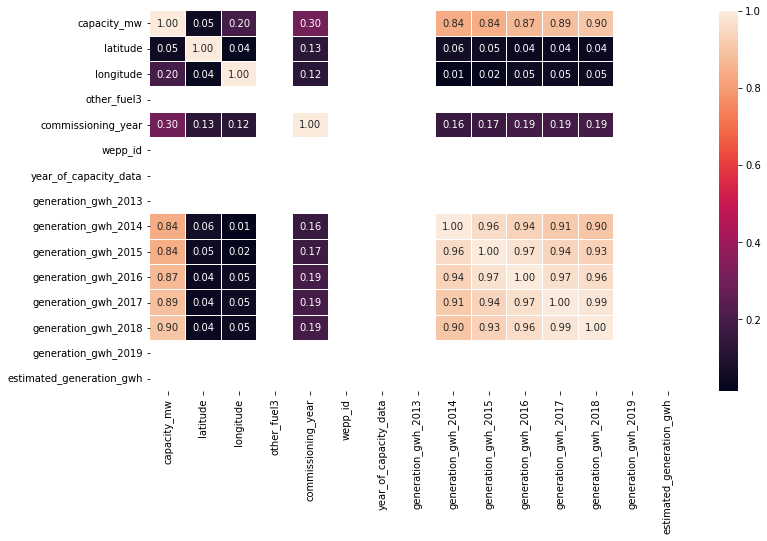

In [37]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="White",fmt='.2f')

Following columns are highly correlated to target column (capcity_mw) 

- generation_gwh_2014         
- generation_gwh_2015        
- generation_gwh_2016         
- generation_gwh_2017        
- generation_gwh_2018   

Dropping these column will reduce number of non categorical features available to calculate capacity_mw, which can effect overall accuracy of model and hence we decide not to drop.

In [38]:
size=df.shape[1]
a=[]
z=["generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"]
for i in range(size):
  col=df.iloc[:,i]
  x=col.isnull().sum()
  if x>0 or x!=df.shape[0]:
    if df.columns[i] not in z:
      loss=df.shape[0]*0.3
      if x>loss:
        a.append(df.columns[i])

for i in a:
  df=df.drop([i],axis=1)

- If data loss is more than 30% in a column, then we drop it, except columns mentioned in above list.

In [39]:
df.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [40]:
list1=["latitude","longitude"]+z
for i in list1:
  df[i]=df[i].fillna(df[i].mean())

from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["geolocation_source"]=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))

- Replacing null values.

In [41]:
df.isnull().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

# Visualization

IND    907
Name: country, dtype: int64


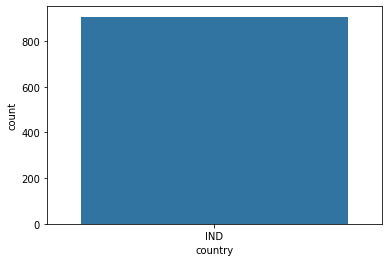

In [ ]:
sns.countplot(df["country"])
print(df["country"].value_counts())

- Only one country is mentioned in entire dataset i.e. IND

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


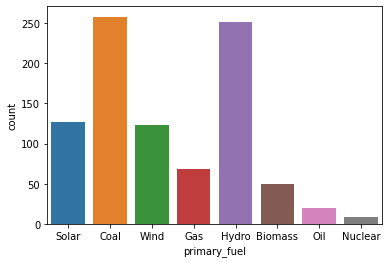

In [ ]:
sns.countplot(df['primary_fuel'])
print(df['primary_fuel'].value_counts())

Number of power plants that use following primary fuel
- Coal       - 258
- Hydro      - 251
- Solar      - 127
- Wind       - 123
- Gas         - 69
- Biomass     - 50
- Oil         - 20
- Nuclear      - 9

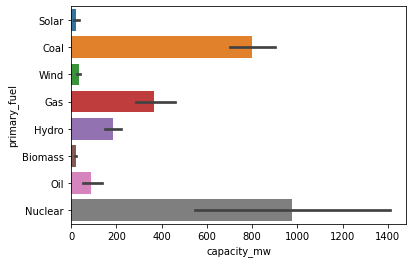

In [ ]:
import matplotlib.pyplot as plt

sns.barplot(x='capacity_mw',y='primary_fuel',data=df)


- Nuclear energy has highest electricity generating capacity in megawatts
- Solar and biomass has lowest electricity generating capacity in megawatts


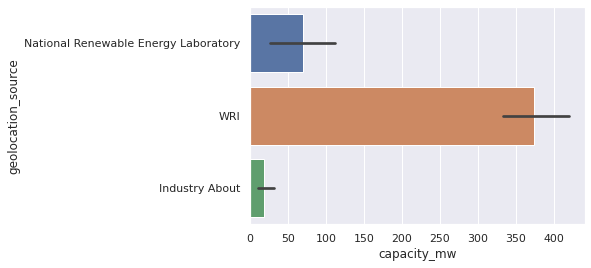

In [ ]:
sns.barplot(y='geolocation_source', x='capacity_mw',data=df)

Capacity of electricity generation in geolocation source
- WRI has highest capacity_mw
- Industry About has lowest capacity_nw


Text(0, 0.5, 'gwh_2018')

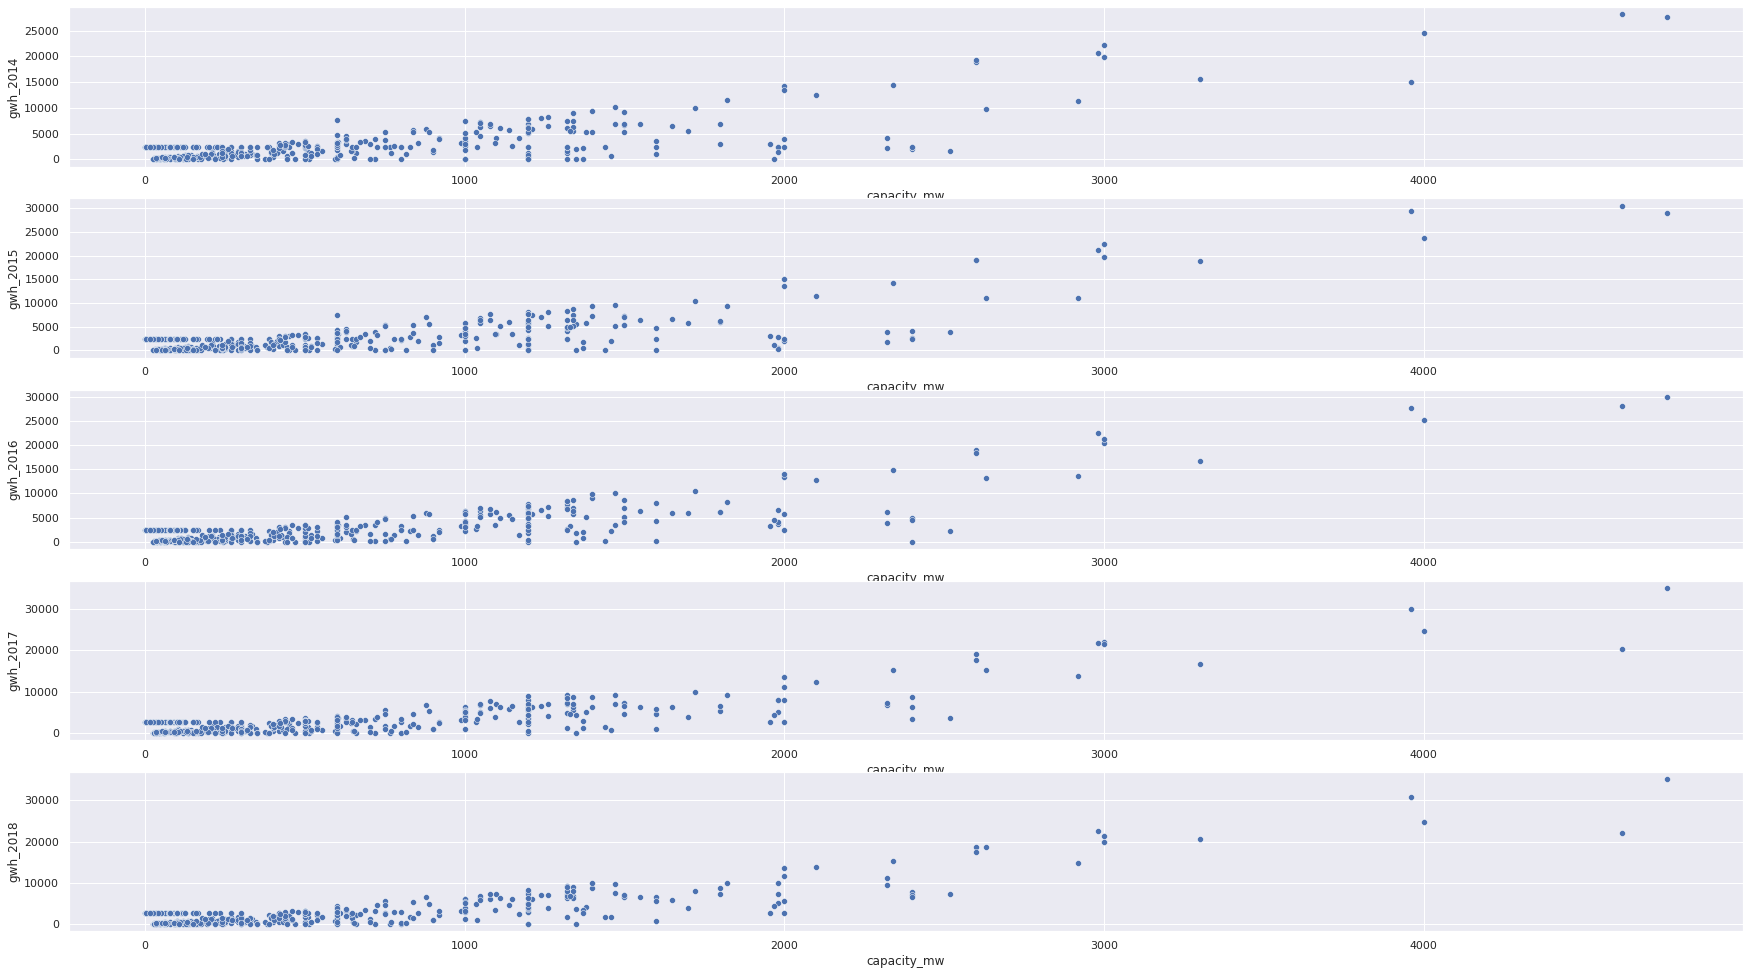

In [ ]:
sns.set()
fig,axes=plt.subplots(5,figsize=(30,17))
sns.scatterplot(y='generation_gwh_2014', x='capacity_mw',data=df,ax=axes[0])
axes[0].set_ylabel('gwh_2014')
sns.scatterplot(y='generation_gwh_2015', x='capacity_mw',data=df,ax=axes[1])
axes[1].set_ylabel('gwh_2015')
sns.scatterplot(y='generation_gwh_2016', x='capacity_mw',data=df,ax=axes[2])
axes[2].set_ylabel('gwh_2016')
sns.scatterplot(y='generation_gwh_2017', x='capacity_mw',data=df,ax=axes[3])
axes[3].set_ylabel('gwh_2017')
sns.scatterplot(y='generation_gwh_2018', x='capacity_mw',data=df,ax=axes[4])
axes[4].set_ylabel('gwh_2018')

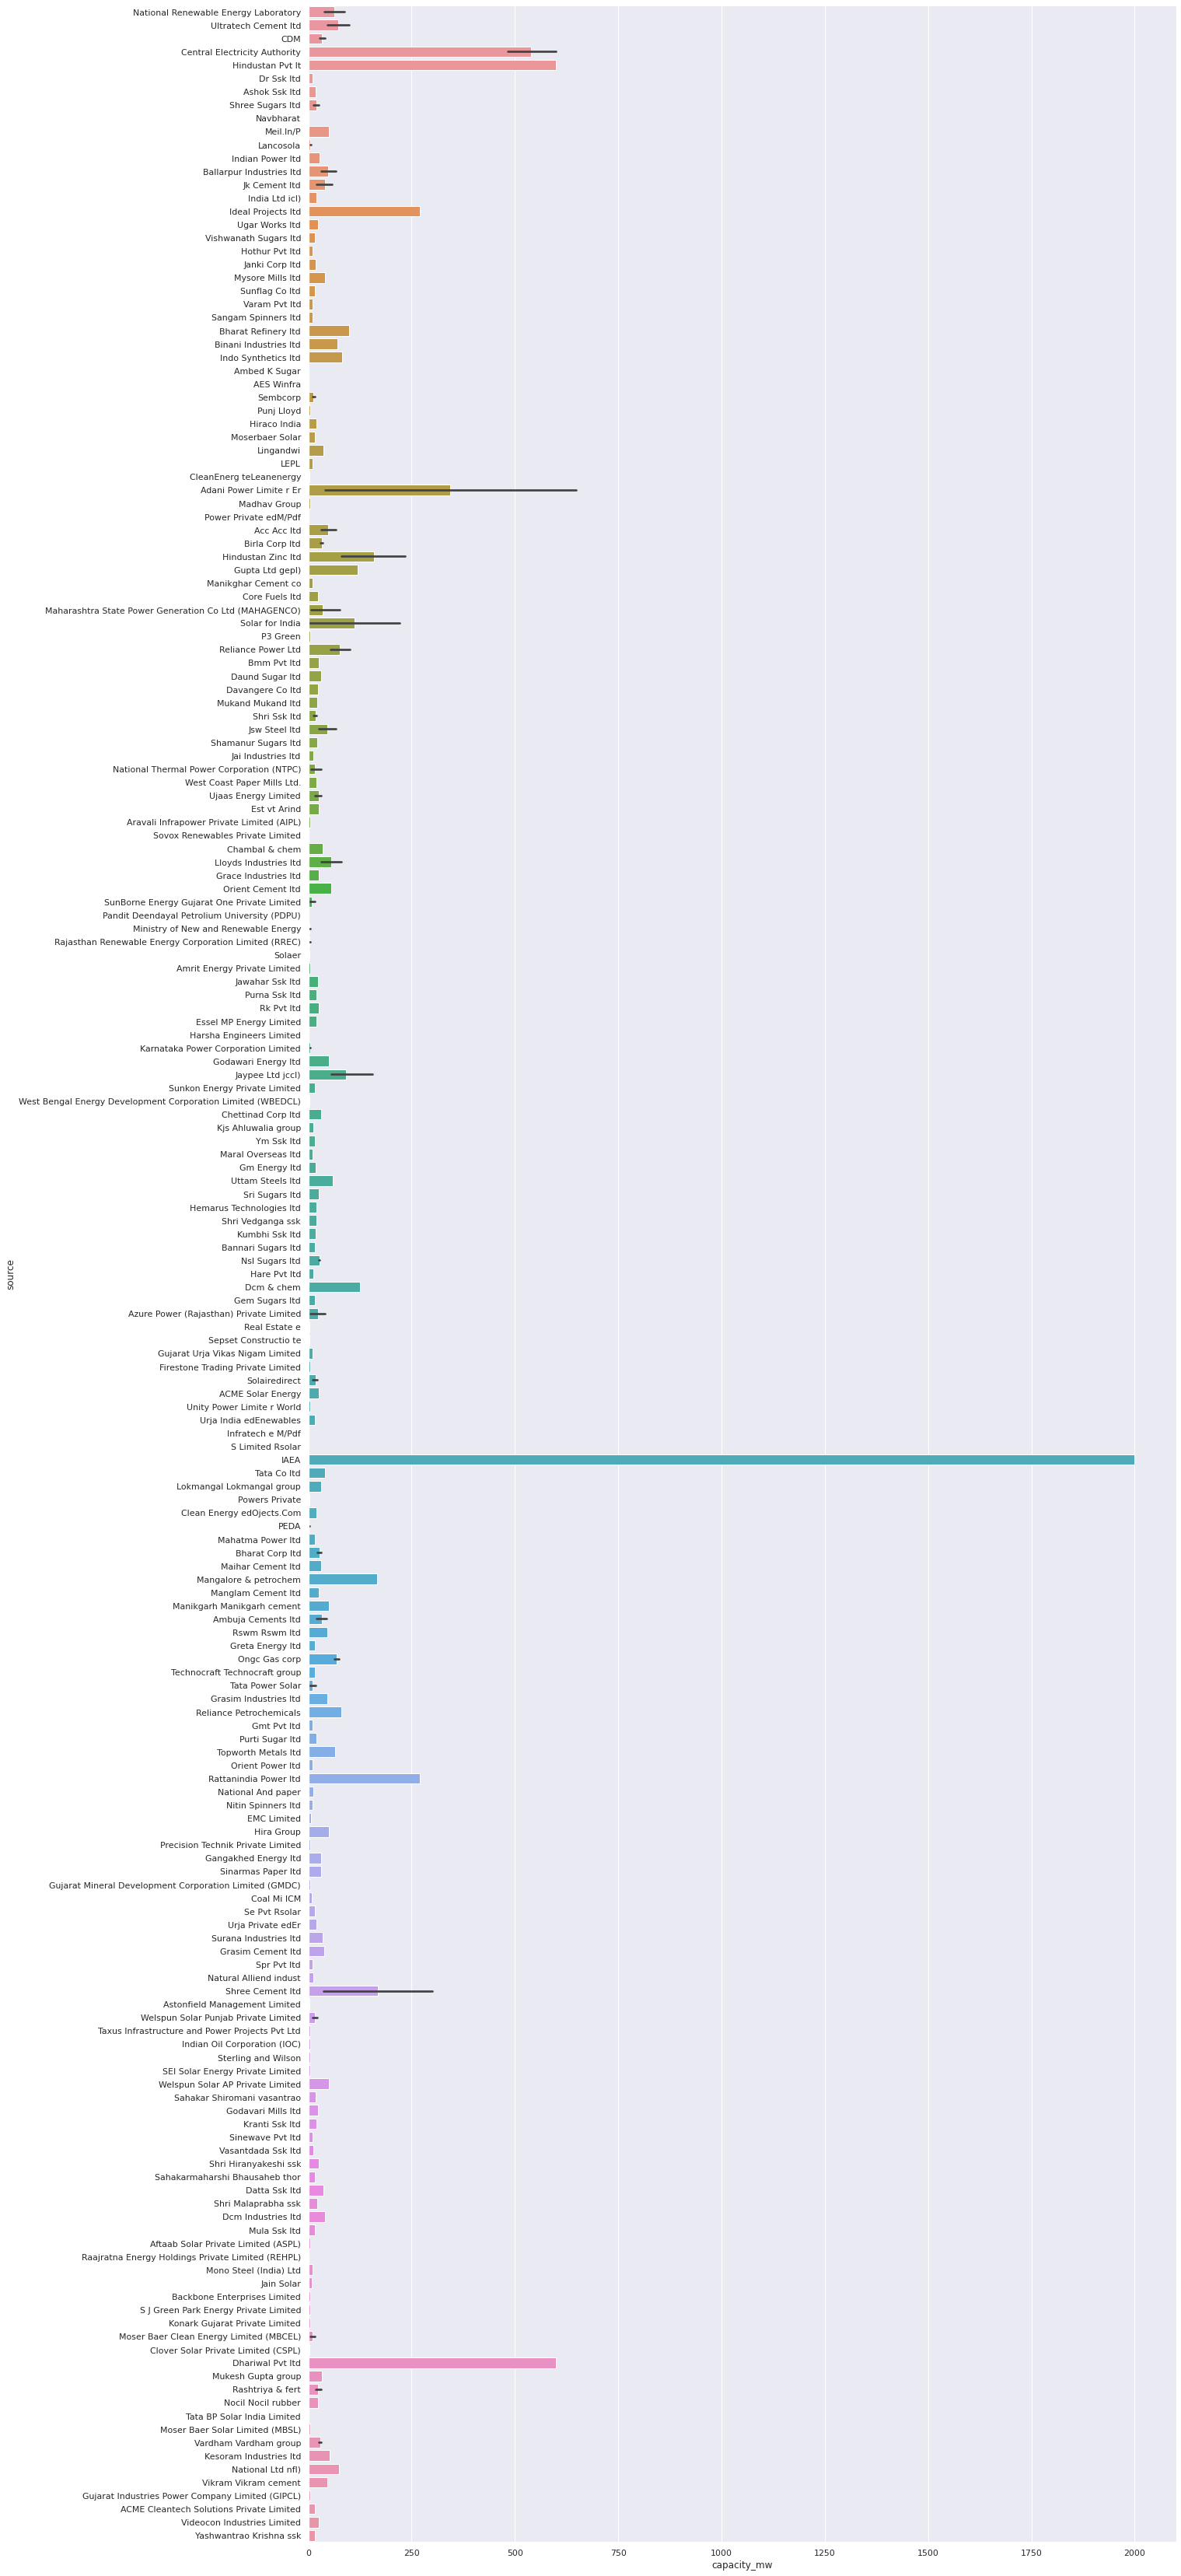

In [ ]:
plt.figure(figsize=(20,60))
sns.barplot(y='source', x='capacity_mw',data=df)


- Source IAEA has highest capacity_mw 

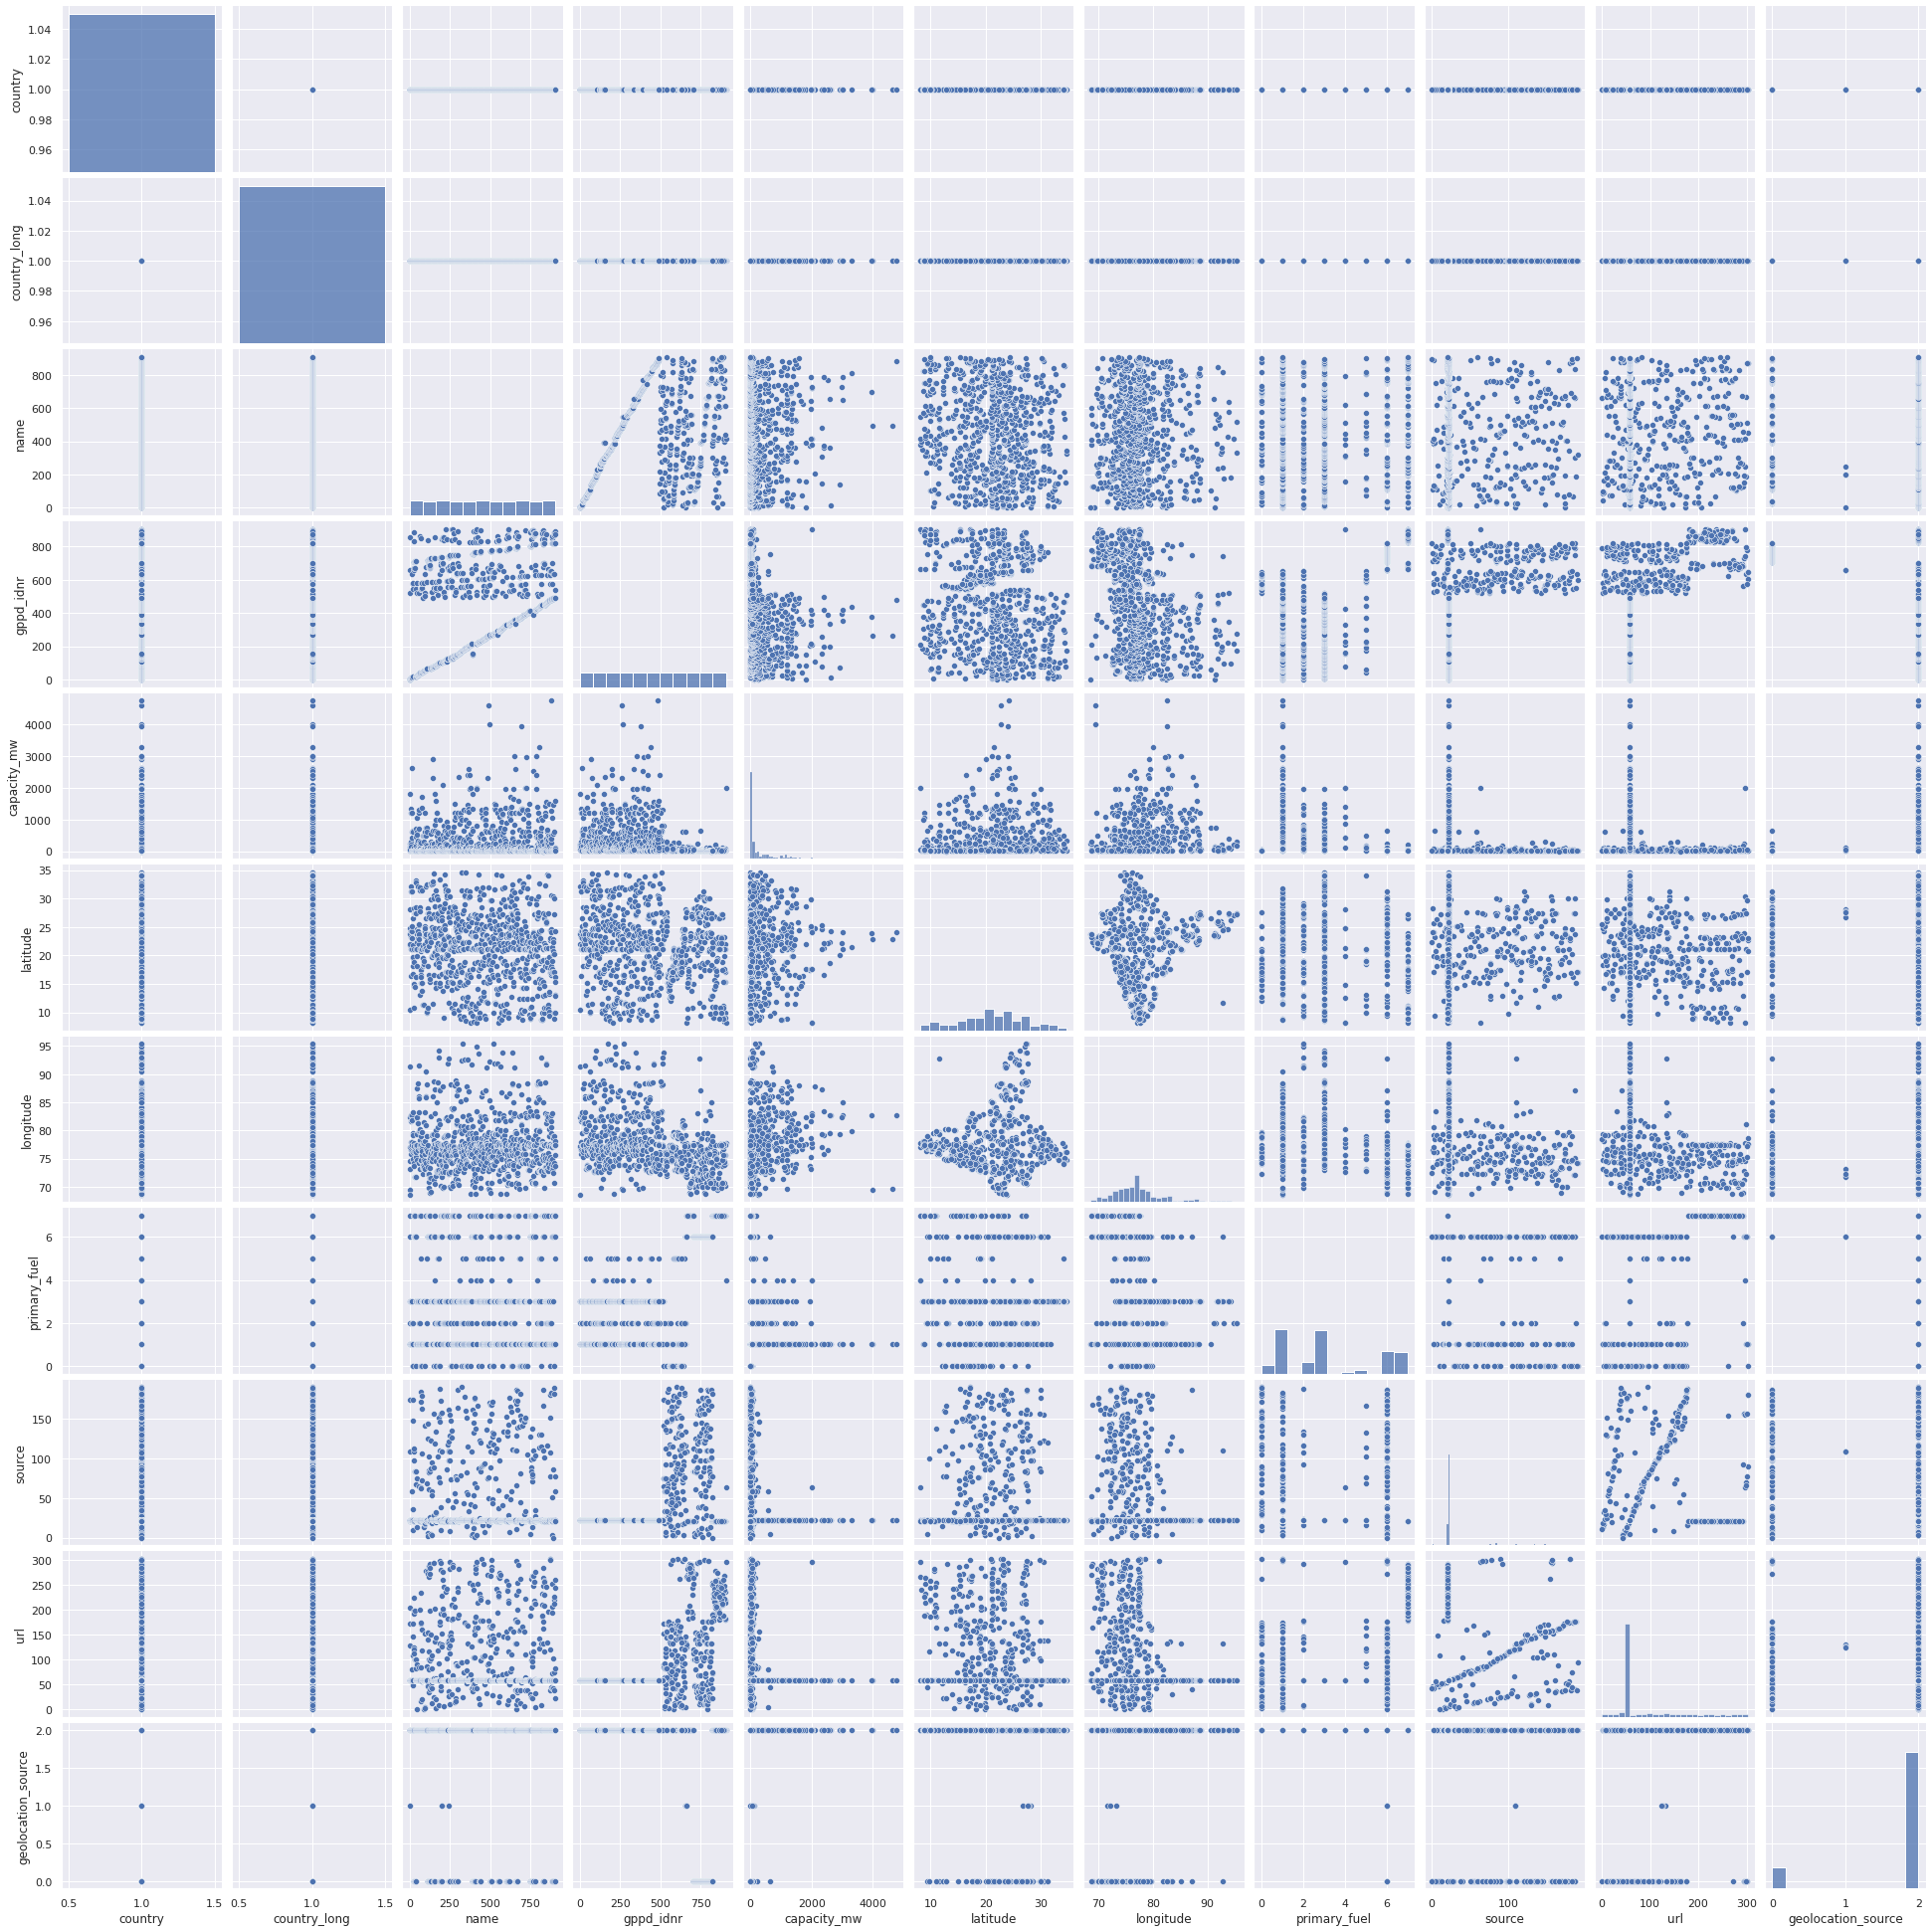

In [ ]:
sns.pairplot(df)

# Detecting Correlation

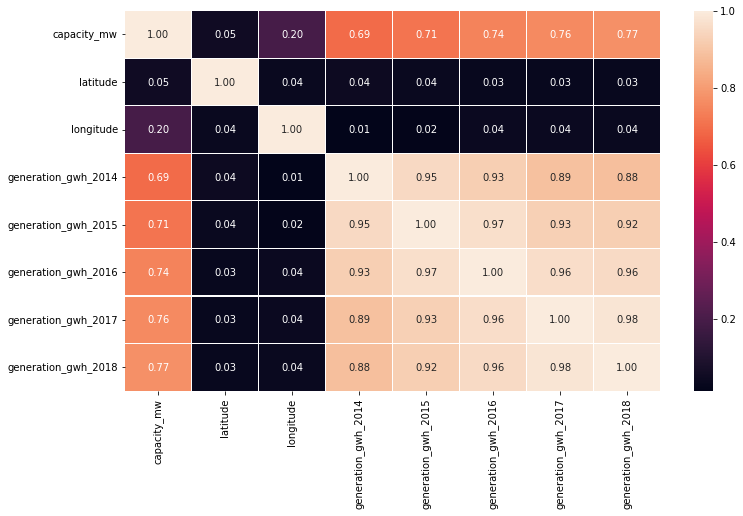

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="White",fmt='.2f')


- latitude has 5 percent correlation with target column which is considered as a very weak +ve bond.
- longitude has 20 percent correlation with target column which is considered as a weak +ve bond.
- generation_gwh_2014 has 69 percent correlation with target column which is considered as a strong +ve bond.
- generation_gwh_2015 has 71 percent correlation with target column which is considered as a strong +ve bond.
- generation_gwh_2016 has 74 percent correlation with target column which is considered as a strong +ve bond.
- generation_gwh_2017 has 76 percent correlation with target column which is considered as a strong +ve bond.
- generation_gwh_2018 has 77 percent correlation with target column which is considered as a strong +ve bond.

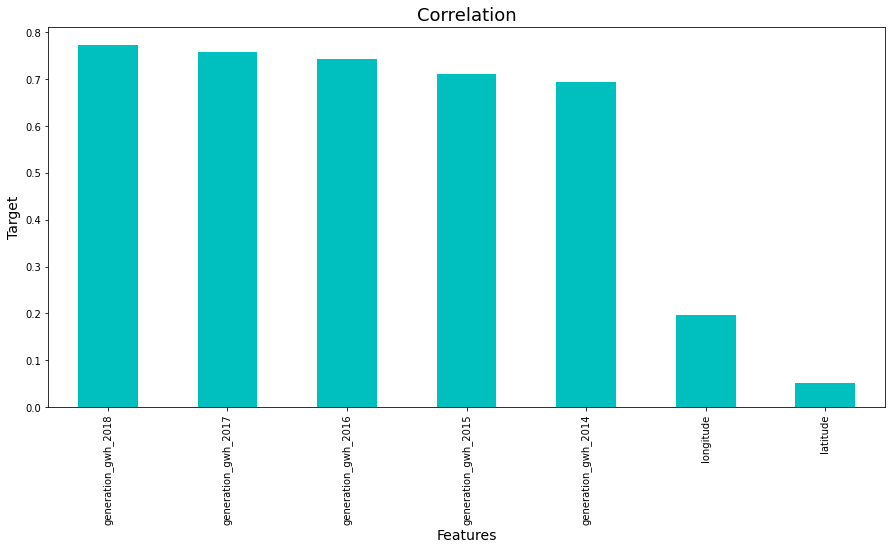

In [ ]:
plt.figure(figsize=(15,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()


- Max +ve Correlation : generation_gwh_2018

- Min +ve Correlation : latitude

# Decribing data

In [ ]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


- There is huge gap between 75% and Max value which indicates presence of outlier in some of the features.

- Data is widely spread in most of the features.

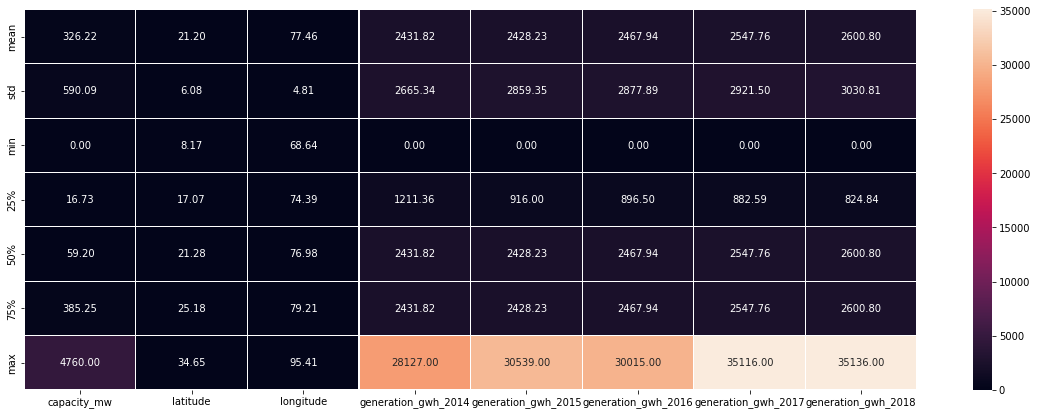

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.describe()[1:],annot=True,linewidths=0.1,linecolor="white",fmt="0.2f")

capacity_mw	
- mean -	326.223755	
- std -	590.085456	
- min -	0.000000
- max -	4760.000000	

latitude	
- mean -	21.197918	
- std -	6.079148	
- min -	8.168900	
- max -	34.649000	

longitude	
- mean -	77.464907	
- std -	4.812291
- min -	68.644700	
- max -	95.408000	

generation_gwh_2014	
- mean -	2431.823590	
- std -	2665.338608
- min -	0.000000
- max -	28127.000000	

generation_gwh_2015	
- mean -	2428.226946	
- std -	2859.349132	
- min -	0.000000	
- max -	30539.000000	

generation_gwh_2016	
- mean -	2467.936859	
- std -	2877.890004	
- min -	0.000000	
- max -	30015.000000

generation_gwh_2017	
- mean -	2547.759305	
- std -	2921.502193	
- min -	0.000000	
- max -	35116.000000	

generation_gwh_2018
- mean -	2600.804099
- std -	3030.808041
- min -	0.000000
- max -	35136.000000




# Separating input feature and target

In [42]:
x=df.drop(["capacity_mw"],axis=1)
x.head()

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,ACME Solar Tower,WRI1020239,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,IND,India,AES Saurashtra Windfarms,WRI1026669,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,IND,India,AGARTALA GT,IND0000001,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,India,AKALTARA TPP,IND0000002,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [43]:
y=df["capacity_mw"]
y.head()

0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

#Encoding Categorical Features

In [44]:
x.dtypes

country                 object
country_long            object
name                    object
gppd_idnr               object
latitude               float64
longitude              float64
primary_fuel            object
source                  object
url                     object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
list3=["name","gppd_idnr","primary_fuel","source","url","geolocation_source"]
for i in list3:
  x[i]=enc.fit_transform(x[i].values.reshape(-1,1))

val={"country":{"IND":1},"country_long":{"India":1}}
x=x.replace(val)

x.head()

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1,1,0,657,28.1839,73.2407,6,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,1,1,519,24.7663,74.6090,1,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,1,1,2,853,21.9038,69.3732,7,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,1,1,3,0,23.8712,91.3602,2,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1,4,1,21.9603,82.4091,1,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# Detecting Outliers

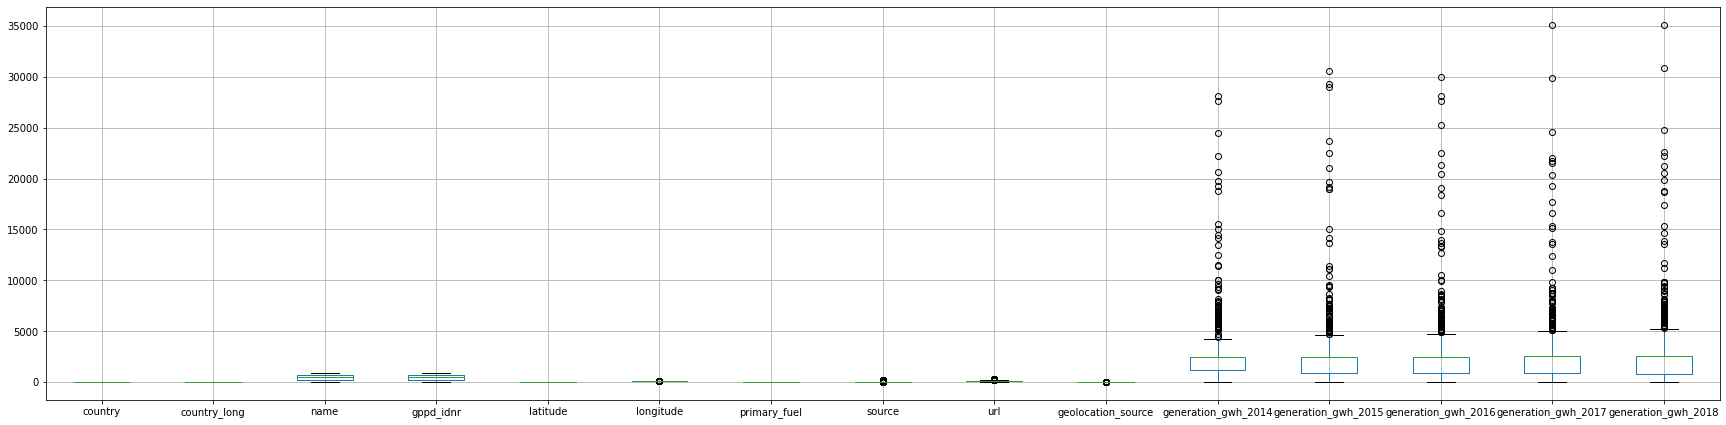

In [46]:
x.iloc[:,:16].boxplot(figsize=(30,7))
plt.subplots_adjust(bottom=0.1)
plt.show()

The following features contain outliers
- longitude
- source
- url
- geolocation_source

From the above mentioned features all features except longitude is categorical in nature.

In [47]:
df1=x.copy()
new_df_cap=df1.copy()

In [48]:
def remove_outliers(n):
  Q1=np.percentile(df1[n],25,interpolation='midpoint')
  Q3=np.percentile(df1[n],75,interpolation='midpoint')
  iqr=Q3-Q1
  percentile25=df1[n].quantile(0.25)
  percentile75=df1[n].quantile(0.75)
  upper_limit=percentile75+1.5*iqr
  lower_limit=percentile25-1.5*iqr
  df1[df1[n]>upper_limit]
  df1[df1[n]<lower_limit]

  new_df=df1[df1[n]<upper_limit]
  
  new_df_cap[n]=np.where(
      new_df_cap[n] > upper_limit,
      upper_limit,
      np.where(
          new_df_cap[n] < lower_limit,
          lower_limit,
          new_df_cap[n] ) 
      )
  sns.boxplot(new_df_cap[n])

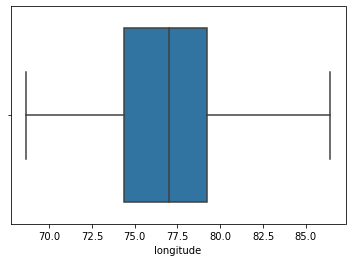

In [49]:
remove_outliers("longitude")

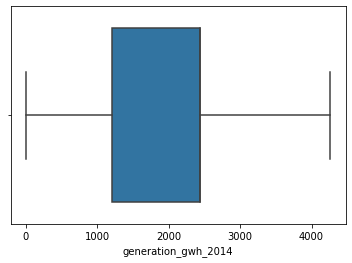

In [50]:
remove_outliers('generation_gwh_2014')

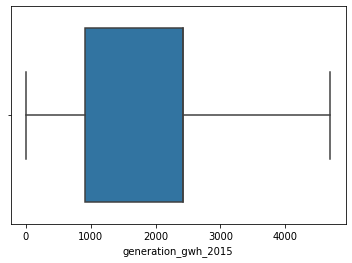

In [51]:
remove_outliers('generation_gwh_2015')

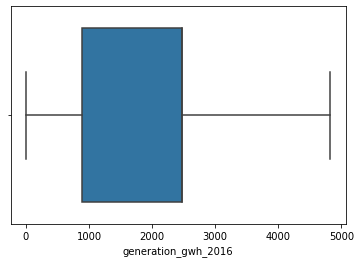

In [52]:
remove_outliers('generation_gwh_2016')

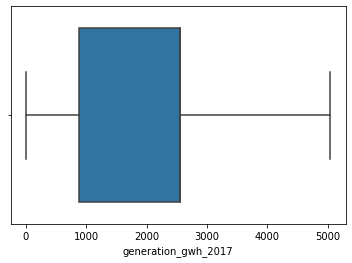

In [53]:
remove_outliers('generation_gwh_2017')

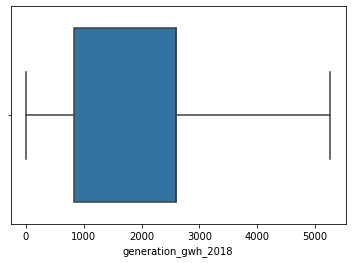

In [54]:
remove_outliers('generation_gwh_2018')

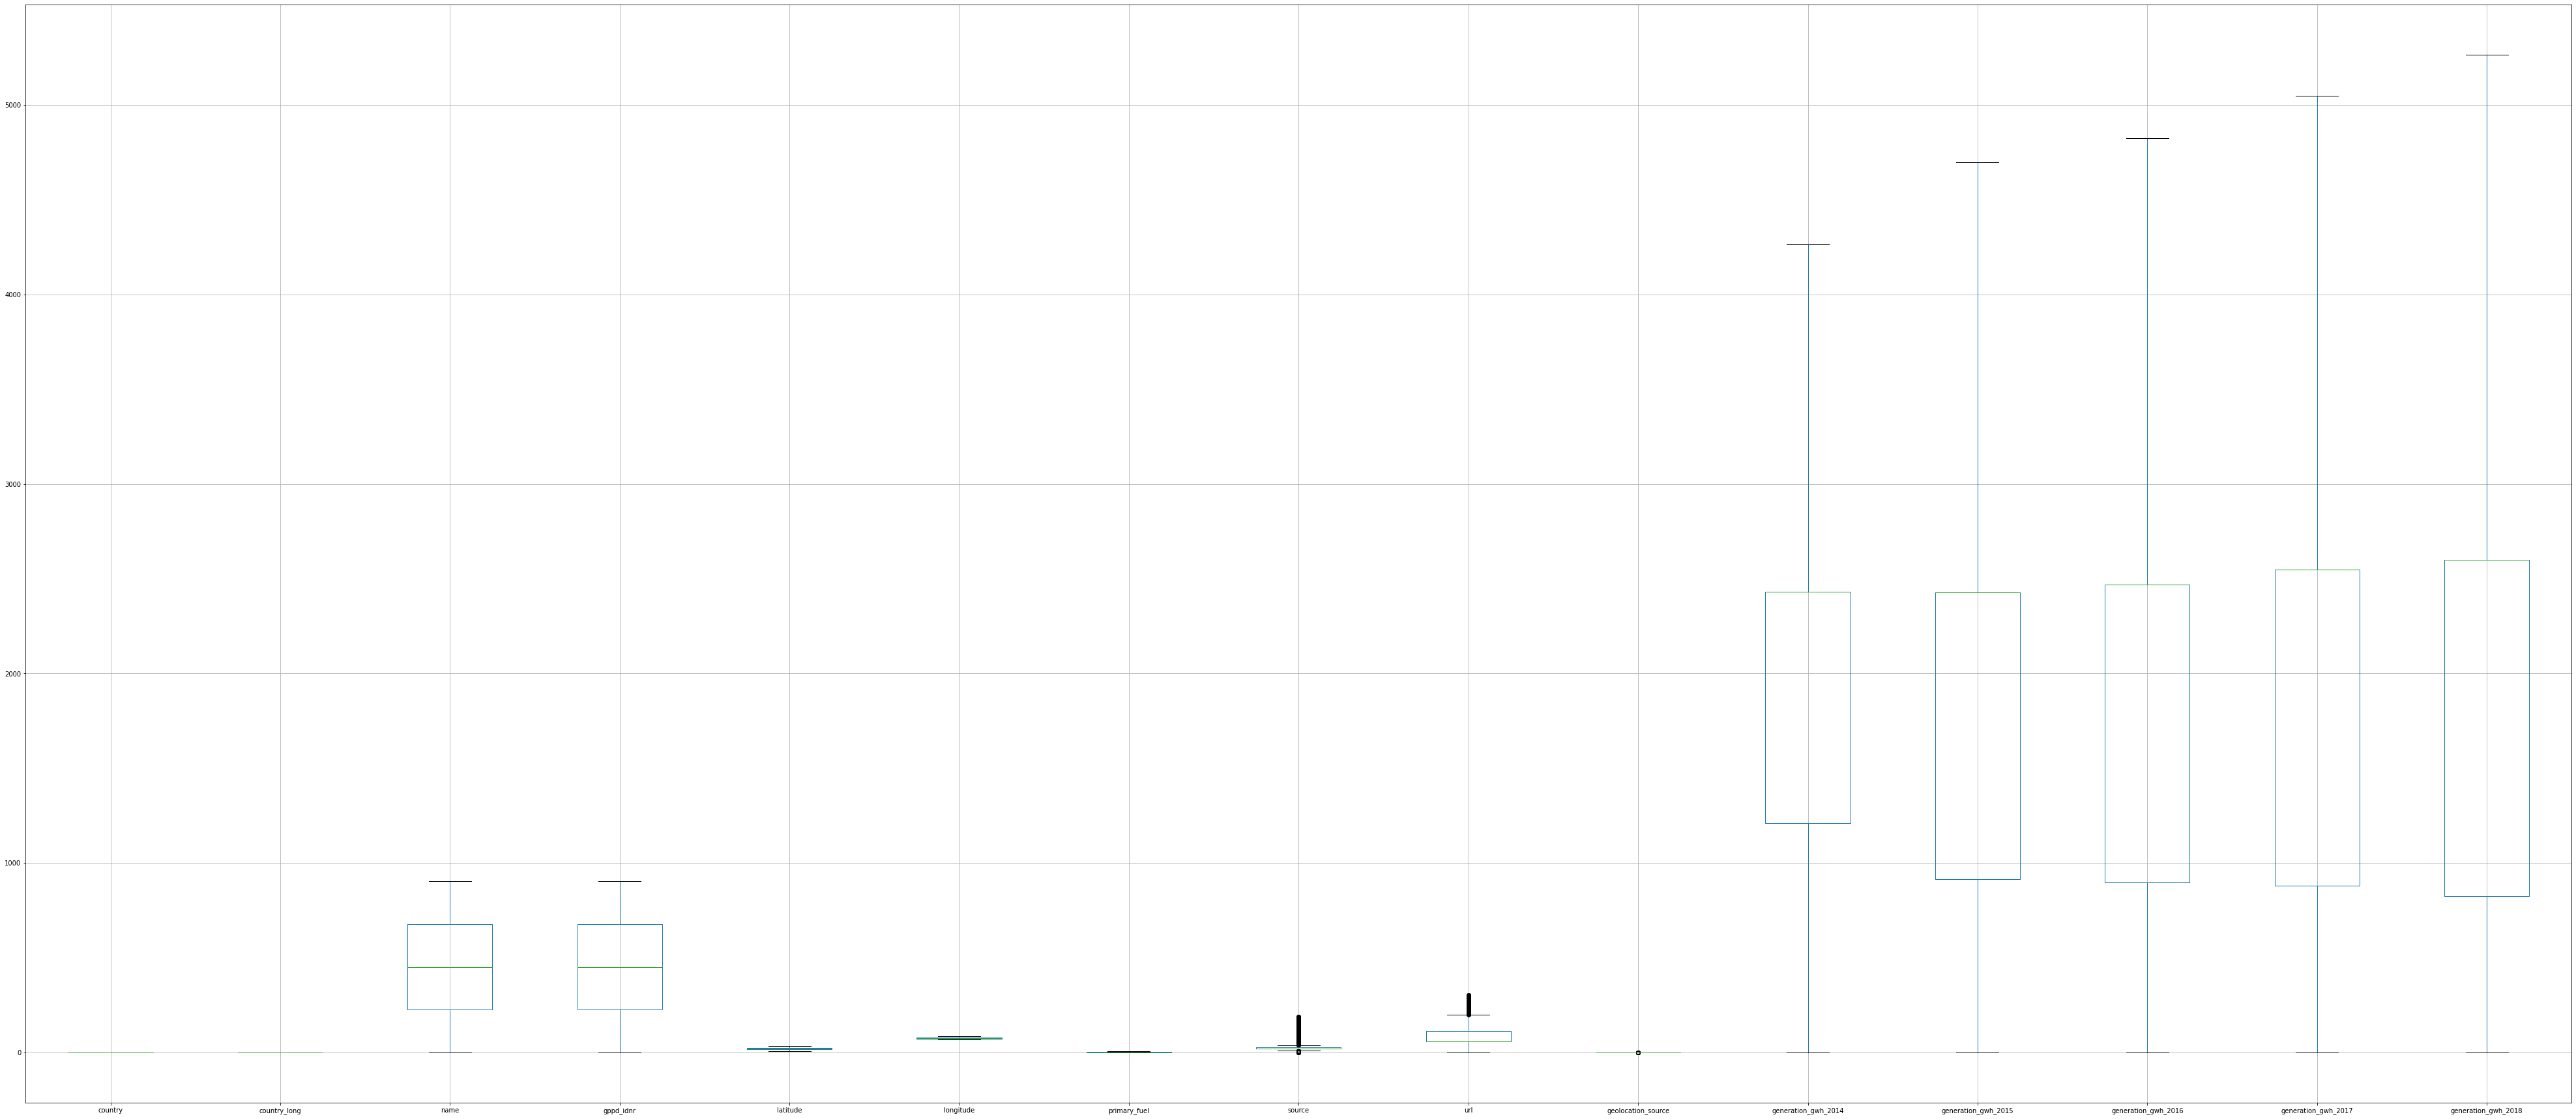

In [55]:
new_df_cap.iloc[:,:16].boxplot(figsize=(70,30))
plt.subplots_adjust(bottom=0.1)
plt.show()

# Detecting Skewness

In [56]:
new_df_cap.skew().sort_values()

geolocation_source    -2.159841
generation_gwh_2014   -0.254378
latitude              -0.149698
country                0.000000
country_long           0.000000
name                   0.000000
gppd_idnr              0.000000
generation_gwh_2015    0.065204
generation_gwh_2016    0.113697
generation_gwh_2017    0.170788
generation_gwh_2018    0.255769
primary_fuel           0.472251
longitude              0.561989
url                    1.510537
source                 1.827373
dtype: float64

Keeping +/- 0.5 as the range of the skewness, the following features are skewed
- geolocation_source  
- longitude                   
- url                   
- source                      

From above list only longitude is numeric, hence we can remove skewness.

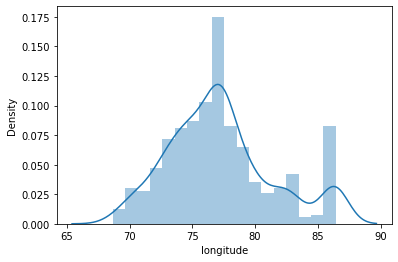

In [57]:
sns.distplot(new_df_cap["longitude"])

In [58]:
from sklearn.preprocessing import power_transform
new_df_cap["longitude"]=power_transform(new_df_cap["longitude"].values.reshape(-1,1))

Text(0, 0.5, 'longitude')

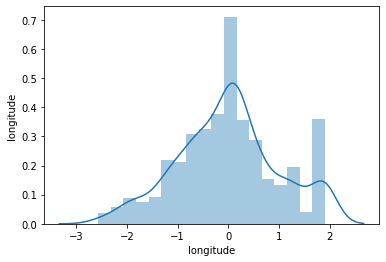

In [59]:
sns.distplot(new_df_cap.iloc[:,5])
plt.ylabel("longitude")

- Slight skewness can be observed in the graph
- So we apply different method to see if the distribution can be further improved.

Text(0, 0.5, 'longitude')

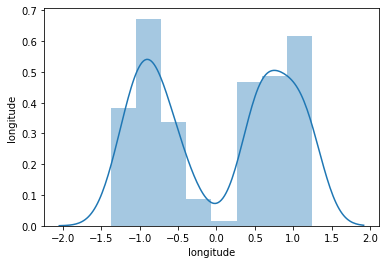

In [62]:
n=np.cbrt(new_df_cap.iloc[:,5])
sns.distplot(n)
plt.ylabel("longitude")

- There is slight skewness in bimodal graph.
- Since skewness is slight in graph and distribution doesnt improve any further, we decide to keep the column.

In [ ]:
new_df_cap.skew().sort_values()

geolocation_source    -2.159841
generation_gwh_2014   -0.254378
latitude              -0.149698
country                0.000000
country_long           0.000000
name                   0.000000
gppd_idnr              0.000000
longitude              0.017042
generation_gwh_2015    0.065204
generation_gwh_2016    0.113697
generation_gwh_2017    0.170788
generation_gwh_2018    0.255769
primary_fuel           0.472251
url                    1.510537
source                 1.827373
dtype: float64

# Detecting Collinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(new_df_cap)

,variables,VIF
0,country,0.000000
1,country_long,0.000000
2,name,1.367894
3,gppd_idnr,3.644035
4,latitude,1.104480
5,longitude,1.318906
6,primary_fuel,3.686079
7,source,2.055602
8,url,2.985089
9,geolocation_source,3.153120


- VIF>5, hence there is collinearity
- Looking at correlation matrix, we decide to drop generation_gwh_2017, generation_gwh_2015

In [ ]:
X=new_df_cap.drop(["generation_gwh_2017","generation_gwh_2015"],axis=1)
calc_vif(X)

,variables,VIF
0,country,0.000000
1,country_long,0.000000
2,name,1.362671
3,gppd_idnr,3.632670
4,latitude,1.104148
5,longitude,1.315790
6,primary_fuel,3.677619
7,source,2.052980
8,url,2.984344
9,geolocation_source,3.152765


# Training and Testing dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


mns=MinMaxScaler()
s=mns.fit_transform(X)
x=pd.DataFrame(data=s)
print(x)

      0    1         2         3         4         5         6         7   \
0    0.0  0.0  0.000000  0.725166  0.755851  0.355326  0.857143  0.573684   
1    0.0  0.0  0.001104  0.572848  0.626788  0.444575  0.142857  0.915789   
2    0.0  0.0  0.002208  0.941501  0.518688  0.062768  1.000000  0.110526   
3    0.0  0.0  0.003311  0.000000  0.592985  1.000000  0.285714  0.115789   
4    0.0  0.0  0.004415  0.001104  0.520821  0.846547  0.142857  0.115789   
..   ...  ...       ...       ...       ...       ...       ...       ...   
902  0.0  0.0  0.995585  0.541943  0.306872  0.605072  0.142857  0.115789   
903  0.0  0.0  0.996689  0.907285  0.178409  0.648032  0.857143  0.405263   
904  0.0  0.0  0.997792  0.983444  0.268386  0.504066  1.000000  0.110526   
905  0.0  0.0  0.998896  0.594923  0.611066  0.389179  0.142857  0.310526   
906  0.0  0.0  1.000000  0.966887  0.066673  0.611562  1.000000  0.110526   

           8    9         10        11        12  
0    0.422442  0.5  0.57

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, training accuracy: {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, testing accuracy: {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, training accuracy: 0.5269348168018564
At random state 0, testing accuracy: 0.5461632258251521


At random state 1, training accuracy: 0.5390368470385745
At random state 1, testing accuracy: 0.5023991448156134


At random state 2, training accuracy: 0.527475071986806
At random state 2, testing accuracy: 0.5554365698872683


At random state 3, training accuracy: 0.5176443955795478
At random state 3, testing accuracy: 0.6053795828453948


At random state 4, training accuracy: 0.5353659026585613
At random state 4, testing accuracy: 0.5208871482051017


At random state 5, training accuracy: 0.517605201749133
At random state 5, testing accuracy: 0.5866288630429952


At random state 6, training accuracy: 0.5294783925290647
At random state 6, testing accuracy: 0.5532510027048061


At random state 7, training accuracy: 0.535740753814713
At random state 7, testing accuracy: 0.5156727830647178


At random state 8, training accuracy: 0.5179997706719497
At random state 8, testing

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)
lr.fit(x_train,y_train) 
pred_train=lr.predict(x_train)
print("Testing Score:",r2_score(y_test,pred_test)*100)

Testing Score: 53.60278877567297


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_test))
print("Mean Sq. Error ",mean_squared_error(y_test,pred_test))
print("Root Mean Sq ",np.sqrt(mean_squared_error(y_test,pred_test)))

Mean Absolute Error  259.4727613001342
Mean Sq. Error  138682.84339615155
Root Mean Sq  372.4014546106816


# Cross validation

In [ ]:
train_ac=r2_score(y_train,pred_train)
test_ac=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cv= {j} cv score is {cv_mean} and accuracy for training is {train_ac} and testing is {train_ac}")
    print("\n")

At cv= 2 cv score is 0.4770093228548388 and accuracy for training is 0.5334488917462229 and testing is 0.5334488917462229


At cv= 3 cv score is 0.4958510730970547 and accuracy for training is 0.5334488917462229 and testing is 0.5334488917462229


At cv= 4 cv score is 0.5116775693638664 and accuracy for training is 0.5334488917462229 and testing is 0.5334488917462229


At cv= 5 cv score is 0.5160764451928704 and accuracy for training is 0.5334488917462229 and testing is 0.5334488917462229


At cv= 6 cv score is 0.5018887546137031 and accuracy for training is 0.5334488917462229 and testing is 0.5334488917462229


At cv= 7 cv score is 0.5225786487687345 and accuracy for training is 0.5334488917462229 and testing is 0.5334488917462229


At cv= 8 cv score is 0.5203081249971554 and accuracy for training is 0.5334488917462229 and testing is 0.5334488917462229


At cv= 9 cv score is 0.5057649336789496 and accuracy for training is 0.5334488917462229 and testing is 0.5334488917462229


At cv= 1

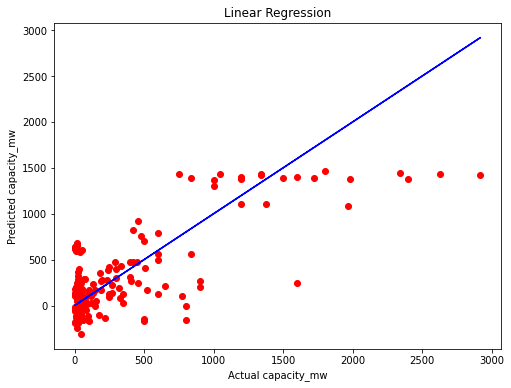

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual capacity_mw")
plt.ylabel("Predicted capacity_mw")
plt.title("Linear Regression")
plt.show()

# Regularization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],
            'random_state': list(range(0,10)),
            'selection':['cyclic', 'random'],
            'fit_intercept': ['True','False']}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'fit_intercept': 'True', 'random_state': 7, 'selection': 'random'}


In [ ]:
ls=Lasso(alpha=1,random_state=7,fit_intercept=True,selection='random')
ls.fit(x_train,y_train)
ls_score_train=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
print("Training Accuracy :",ls_score_train*100)

Training Accuracy : 53.20244242494647


In [ ]:
lss=r2_score(y_test,pred_ls)
print("Testing Accuracy : ",lss*100)

Testing Accuracy :  53.899436641024124


In [ ]:
cv_score=cross_val_score(ls,x,y,cv=7)
cv_mean=cv_score.mean()
print("Cross Validation : ",cv_mean*100)

Cross Validation :  52.305008635075886


#Model Selection

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",r2_score(y_train,model_pred_train)*100)
    print("Accuracy of test data :",r2_score(y_test,model_pred_test)*100)
    rfscore=cross_val_score(algorithm_instance,x,y,cv=7)
    rfc=rfscore.mean()
    print('Cross Val Score:',rfc*100)
    print("\nMean Absolute Error ",mean_absolute_error(y_test,model_pred_test))
    print("Mean Sq. Error ",mean_squared_error(y_test,model_pred_test))
    print("Root Mean Sq ",np.sqrt(mean_squared_error(y_test,model_pred_test)))
    print("\n")

# KNR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
dtc = KNeighborsRegressor()
model_selection(dtc,x_train,y_train,x_test,y_test)

Accuracy of training model : 78.0572516790959
Accuracy of test data : 64.59586500019667
Cross Val Score: 65.15982259170336

Mean Absolute Error  173.43354505494503
Mean Sq. Error  105824.16443123516
Root Mean Sq  325.3062625146266




# SVR

In [ ]:
from sklearn import svm

k=svm.SVR()
model_selection(k,x_train,y_train,x_test,y_test)

Accuracy of training model : -14.281983805149956
Accuracy of test data : -18.503677551685914
Cross Val Score: -15.452080476711675

Mean Absolute Error  295.37109967154163
Mean Sq. Error  354211.5252640785
Root Mean Sq  595.1567232789012




# DecisioTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
model_selection(dtc,x_train,y_train,x_test,y_test)

Accuracy of training model : 100.0
Accuracy of test data : 59.97797078850786
Cross Val Score: 47.08396939249683

Mean Absolute Error  167.4214010989011
Mean Sq. Error  119627.20739179669
Root Mean Sq  345.8716631812972




# XGBOOST

In [ ]:
import xgboost as xg
xgb = xg.XGBRegressor()
model_selection(xgb,x_train,y_train,x_test,y_test)

[08:17:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy of training model : 92.62871752371198
Accuracy of test data : 70.32679797149837
[08:17:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:17:16] WARNING: /w

# Ensemble Methods

# RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameter={'criterion':['mse','mae'],
          'max_features' : ["auto","sqrt","log2"],
           'n_estimators':range(0,100,10)}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2', 'n_estimators': 90}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(criterion='mae',max_features="log2", n_estimators=90)
model_selection(rf,x_train,y_train,x_test,y_test)


Accuracy of training model : 96.70285138036958
Accuracy of test data : 76.46307328696274
Cross Val Score: 72.77151536718011

Mean Absolute Error  137.28738455433455
Mean Sq. Error  70352.6749827449
Root Mean Sq  265.2407868008706




# AdaBoostRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

parameter={'loss':['linear', 'square', 'exponential'],
          'random_state' : range(0,100,10),
           'learning_rate':[0,1.0,2.0],
           'n_estimators':range(0,100,10)}

rf2=AdaBoostRegressor()
clf=GridSearchCV(rf2,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 10, 'random_state': 0}


In [ ]:
rf2=AdaBoostRegressor(learning_rate= 1.0, loss= 'square', n_estimators= 10, random_state= 0)
model_selection(rf2,x_train,y_train,x_test,y_test)

Accuracy of training model : 83.79894237226459
Accuracy of test data : 70.15363025134396
Cross Val Score: 66.29601693915028

Mean Absolute Error  202.13803692069504
Mean Sq. Error  89211.81494689152
Root Mean Sq  298.6834694905152




# GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

parameter={'loss':['squared_error', 'absolute_error', 'huber','quantile'],
          'criterion':['friedman_mse', 'squared_error', 'mse'],
           'learning_rate':[0,1.0,2.0],
           'n_estimators':range(0,100,10)}

rf3=GradientBoostingRegressor()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'squared_error', 'learning_rate': 1.0, 'loss': 'huber', 'n_estimators': 10}


In [ ]:
rf3=GradientBoostingRegressor(learning_rate= 1.0, loss= 'huber', n_estimators= 10, criterion= 'squared_error')
model_selection(rf3,x_train,y_train,x_test,y_test)

Accuracy of training model : 87.50811436393104
Accuracy of test data : 64.98870409414113
Cross Val Score: 66.12246736899372

Mean Absolute Error  171.4217482936654
Mean Sq. Error  104649.95500985469
Root Mean Sq  323.49645285513515




# BaggingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

parameter={'oob_score':['True','False'],
          'n_jobs':range(0,10,5),
           'random_state':range(0,100,20),
           'n_estimators':range(10,100,30)}

rf4=BaggingRegressor()
clf=GridSearchCV(rf4,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_estimators': 40, 'n_jobs': 5, 'oob_score': 'True', 'random_state': 60}


In [ ]:
rf4=BaggingRegressor(oob_score= True, n_jobs= 5, n_estimators= 40, random_state= 60)
model_selection(rf4,x_train,y_train,x_test,y_test)

Accuracy of training model : 95.99410614305718
Accuracy of test data : 73.38573973245956
Cross Val Score: 69.07809298078841

Mean Absolute Error  139.7192570054945
Mean Sq. Error  79550.92970873415
Root Mean Sq  282.0477436689295




# VotingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

estimators = [ ('knc', KNeighborsRegressor()), ('svr',SVR()) ]
parameter={
          'n_jobs':range(0,10,2),
           'verbose':[True,False]
          }

rf5=VotingRegressor(estimators)
clf=GridSearchCV(rf5,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_jobs': 2, 'verbose': True}


In [ ]:
rf5=VotingRegressor(estimators, n_jobs= 2, verbose= True)
model_selection(rf5,x_train,y_train,x_test,y_test)

Accuracy of training model : 54.573545091337614
Accuracy of test data : 48.26864787487368
Cross Val Score: 49.50419769646059

Mean Absolute Error  186.19091498958988
Mean Sq. Error  154626.77208664766
Root Mean Sq  393.2261080938646




#Saving Model

In [ ]:
import pickle
filename='rfz.pk1'
pickle.dump(rf,open(filename,'wb'))

We selected RandomForest Regressor model since
- it has best cross validation score among all the model and high accuracy.
- it also has least Mean Absolute Error, Mean Sq. Error, Root Mean Sq 

#Loading Saved Model

In [ ]:
loaded_model=pickle.load(open('rfz.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print("\nModel Accuracy:",result*100)
pred_decision=rf.predict(x_test)


Model Accuracy: 76.46307328696274


# Testing Loaded Model

In [ ]:
conc=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted capacity_mw","Actual capacity_mw"])
conc

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
Predicted capacity_mw,360.997222,33.472222,41.901,40.232222,103.508667,39.473333,1472.777778,1540.302222,529.344222,79.176667,...,242.272511,757.266111,1633.402778,1010.242667,23.333333,75.654444,172.836222,598.590889,973.003556,51.804444
Actual capacity_mw,360.997222,33.472222,41.901,40.232222,103.508667,39.473333,1472.777778,1540.302222,529.344222,79.176667,...,242.272511,757.266111,1633.402778,1010.242667,23.333333,75.654444,172.836222,598.590889,973.003556,51.804444
